<a href="https://colab.research.google.com/github/iyadh97/Project-2/blob/main/Project_2_Part_4_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Scroll down for part-4**

Link to the [original dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download)

# **Project 2 - Part 2 :**

We will clean and explore the data set in this part.

* Deleted unnecessary columns.
* Deleted duplicate rows.
* Identified and addressed missing values.
* Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produced univariate visuals for the target and all features.
* Identified outliers.
* Clearly commented all of your cleaning steps and described any decisions you made.

-----------------------------------------
-----------------------------------------
# <font color='green'>**Introduction**


-----------------------------------------
-----------------------------------------




A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.



## **1.1 Data description**
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.



## **1.2 Features Description**
### **1. Categorical Attributes**

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  * Individual work category
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  * Individual's highest education degree
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  * Individual marital status
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  * Individual's occupation
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  * Individual's relation in a family
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  * Race of Individual
* gender: Female, Male.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  * Individual's native country

### **2. Continuous Attributes**

* age: continuous.
  * Age of an individual
* fnlwgt: final weight, continuous.
  * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
  * Individual's working hour per week



-----------------------------------------

# <font color='pink'>**Clarification about some features**

-----------------------------------------




* **`"Workclass"`** is a categorical feature used in the field of machine learning and data mining. It represents the type of organization or occupation that a person is employed in. The possible values for workclass include: Private: employee of a private company Self-emp-not-inc: self-employed individuals such as small business owners like a pharmacy or a small shop Self-emp-inc: self-employed individuals with higher income such as large corporations Federal-gov: federal government employee Local-gov: local government employee State-gov: state government employee Without-pay: individual without income Never-worked: individual who has never worked before

  * **This feature is important in income prediction models, as the type of occupation and organization that a person is employed in can have an impact on their income.**


**`Weighting data`** in a sample is commonly used to provide a better estimate of the population. For example, if a particular group with a smaller number of individuals from the population is underrepresented in the sample, it may also be underrepresented in the final estimate. Therefore, by assigning a weight to each individual in the sample, a better estimate for features such as income, education, age, and gender can be obtained.

* In machine learning models, **`"fnlwgt"`** is also used as one of the input features in predicting income and other demographic features of the population.

* **`"Capital-gain"`** is a feature in financial and economic datasets that represents the profit earned by an individual or business through the sale of a capital asset such as stocks, bonds, or real estate. Capital gain is calculated as the difference between the sale price of the asset and its original purchase price.

  * In machine learning models, capital gain is often used as a predictor of income, as individuals with higher capital gains tend to have higher incomes. This feature can also be used to predict other financial behaviors, such as investment decisions and risk-taking behavior.Capital gain is an important feature in financial analysis and modeling, as it can provide insights into the overall financial health and performance of individuals and businesses.

## **1.3 Objective of this project**

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

-----------------------------------------
-----------------------------------------
# <font color='green'>**Solution**


-----------------------------------------
-----------------------------------------



## **Import Libraries**

In [1]:
## standard imports
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

## Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import time


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
# Set pandas as the default output for sklearn
set_config(transform_output='pandas')

#suppressing scientific notation, add comma & round 2 decimal pts
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")


## **Functions**

In [2]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=1, figsize=(12,8))

  # choosing final context
  sns.set_context('paper')

  #plot the histogram
  df[col].hist(edgecolor='k')
  # sns.histplot(data=df,x = col,ax = axes) # another way to plot using seaborn

  mean_value = df[col].mean()
  axes.axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",lw=2);

  med_value = df[col].median()
  axes.axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}",lw=2);

  axes.legend();

  ## Updating title of top graph
  axes.set_title(f'EDA for {col}',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')
  plt.ylabel('Count', fontsize = 16,fontweight='bold')
  plt.xlabel(col, fontsize = 16,fontweight='bold')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()


def cat_univ_vis(data,feature,rotaion=0,fig=(12,8),axs=0):

  plt.figure(figsize=fig)

  total = float(len(df["income"]) )

  if axs == 0:
    ax = sns.countplot(x=feature, data=data)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",weight='bold')

  else :
    ax = sns.countplot(y=feature, data=data)


  plt.xlabel(feature, fontsize = 14,fontweight='bold')
  plt.title(f'Distribution of {feature}',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')

  plt.xticks(rotation=rotaion);
  plt.show()

def biv_box(data,y,x="income"):

  fig, ax = plt.subplots(figsize=(10,10))

  sns.boxplot(data=data, x=x, y=y)
  plt.ylabel(y, fontsize = 16,fontweight='bold')
  plt.xlabel(x, fontsize = 16,fontweight='bold')
  plt.title(f'Boxplot {y} vs {x}',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
  plt.show()

def biv_plot(data,x,fig=(12,10),hue='income',rotaion=0):

  plt.figure(figsize=fig)

  total = float(len(data[hue]) )

  ax = sns.countplot(x=x, hue=hue, data=data)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center",weight='bold')

  plt.xlabel(x, fontsize = 14,fontweight='bold',color='black')

  plt.title(f'{hue} Distribution by {x}',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')

  plt.xticks(rotation=rotaion,color='black');
  plt.show()

def mult_analysis(data,y,hue,fig=(12,10),x='income'):

  plt.figure(figsize=fig)

  total = float(len(data[hue]) )

  ax = sns.boxplot(x=x,y=y, hue=hue, data=data)

  plt.xlabel(x, fontsize = 14,fontweight='bold',color='black')
  plt.ylabel(y, fontsize = 14,fontweight='bold',color='black')

  plt.title(f'{x} Distribution by {y} and {hue}"',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
  plt.xticks(fontsize = 10,fontweight='bold',color='red');
  plt.show()

def metrics_eval_model():

  train_score = accuracy_score(y_train, train_pred)
  test_score = accuracy_score(y_test, test_pred)

  train_rec = recall_score (y_train, train_pred)
  test_rec = recall_score (y_test, test_pred)

  train_prec = precision_score (y_train, train_pred)
  test_prec = precision_score (y_test, test_pred)

  print('Training set Evals :\n')
  print (f'accuracy is {train_score:.3f}.')
  print (f'recall is {train_rec:.3f}.')
  print (f'precision is {train_prec:.3f}.')
  print('-'*60)
  print('Test set Evals :\n')
  print (f'accuracy is {test_score:.3f}.')
  print (f'recall of is {test_rec:.3f}.')
  print (f'precision of is {test_prec:.3f}.')

  print('-'*60)
  print ('Classification Report of the Test set :')
  print('-'*60)
  print(classification_report(y_test, test_pred));

  print('-'*60)
  print ('Normalized Confusion Matrix for the test set:')
  print('-'*60)

  ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap = 'Blues',normalize='true');
  plt.grid(False)

## **Loading Dataset**

In [3]:
filepath='/content/adult.csv'

df=pd.read_csv(filepath)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country".**

## <font color='yellow'>**Prepare/clean the data for exploratory analysis purposes**

In [4]:
df.shape

(48842, 15)

* This shows that we have 48842 observation and 15 attributes including target attribute(income).

In [5]:
print(df.info())
print(('-'*40))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*40))
print(f'Missing values :\n\n{df.isna().sum()} ')
print(f'\n----There are {df.isna().sum().sum()} missing Values----')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
----------------------------------------
There are 52 duplicate rows.
-

* The dataset does contain 52 duplicated rows that need to be dropped.

* Missing Values:
 There are no clear missing values in this Dataset, but all the missing values are present in the form of "?" as we said above.


In [6]:
# remove duplicates
df.drop_duplicates(inplace = True)
#Verify the result
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Remove the some unnecessary features**

In [7]:
#dropping the columns educational-num and race due to high cardinality(too many unique values)
df.drop(columns=['educational-num','race'],inplace=True)

We removed the "educational-num" and "race" columns as they were irrelevant for the prediction task since they had no impact on the target variable.

* We dropped the "educational-num" column because it duplicated information already present in the "education" column, simplifying our dataset.

* We also removed the "race" column to avoid introducing potential bias and ensure a fair and unbiased prediction model.

In [8]:
#confirming columns was dropped
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

### **Deal with Data Types**

In [9]:
df.sample(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17829,41,Private,122381,Some-college,Married-civ-spouse,Craft-repair,Husband,Male,0,1887,50,United-States,>50K
6116,35,Private,106961,HS-grad,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,<=50K
45881,30,Private,374454,HS-grad,Divorced,Transport-moving,Own-child,Male,0,0,40,United-States,<=50K
17682,55,Private,325007,Assoc-acdm,Married-civ-spouse,Tech-support,Husband,Male,0,0,25,United-States,<=50K
17443,33,Private,114691,Bachelors,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,>50K


In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

* **All data types in the dataset are suitable and require no modifications**

### **Deal with missing values**
Here the dataset is not using the default nan string for missing values, instead "?" is used

Hence we check occurrences of "?" in each column

In [11]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2795
5.73%


occupation
2805
5.75%


native-country
856
1.75%




* **All three columns are categorical columns. It takes much more extra work to estimate values for the missing entries.**

* Since the "workclass" and "occupation" columns have a substantial number of missing values (5.73% and 5.75% respectively), dropping these rows (listwise deletion) might result in a significant loss of data.

  * Instead, a reasonable approach could be to impute them using the mode (most frequent value) of the respective columns.
  * Mode imputation is a standard approach for categorical variables and maintains the categorical nature of the variables.

* **Considering the relative low portion of missing data in the Native-country column, we will drop rows with missing data.**

In [12]:
# Replace "?" with NaN for easier handling
df.replace('?', pd.NA, inplace=True)

# Impute "workclass" and "occupation" with the mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Drop rows with missing values in "native-country"
df.dropna(subset=['native-country'], inplace=True)

**Let's look the data it again** :

In [13]:
df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,Never-married,Prof-specialty,Unmarried,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,Married-civ-spouse,Craft-repair,Husband,Male,0,0,10,United-States,<=50K


In [14]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,Female,0,0,30,United-States,0


### **Checking for inconsistencies in categorical columns and their counts**

In [15]:
#creating a list of object columns
categorical_columns = list(df.select_dtypes(include='object'))

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in {column}:\n {unique_values}")


Unique values in workclass:
 ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in education:
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']

Unique values in marital-status:
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in occupation:
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

Unique values in relationship:
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Unique values in gender:
 ['Male' 'Female']

Unique values in native-country:
 ['United-States' 'Peru' 'Guatemala' 'Mexico' '

### **Deal with categorical columns**
To fit the data into prediction model, we need convert categorical values to numerical ones.

Before that, we will evaluate if any transformation on categorical columns are necessary.

Discretisation is a common way to make categorical data more tidy and meaningful.

In [16]:
df['education'].replace(['Preschool','10th','11th','12th','1st-4th','5th-6th','7th-8th','9th'],
                        ['dropout','dropout','dropout','dropout','dropout','dropout','dropout','dropout'],inplace=True)

df['education'].replace(['HS-Grad','HS-grad'],
                        ['HighGrad','HighGrad'],inplace=True)

df['education'].replace(['Some-college','Assoc-acdm','Assoc-voc'],
                        ['CommunityCollege','CommunityCollege','CommunityCollege'],inplace=True)

df['education'].replace(['Prof-school'],
                        ['Masters'],inplace=True)


print(f"\nUnique values in education column are : \n{df['education'].value_counts()}")




Unique values in education column are : 
HighGrad            15573
CommunityCollege    14324
Bachelors            7803
dropout              6286
Masters              3386
Doctorate             562
Name: education, dtype: int64


In [17]:
df['marital-status'].replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

print(f"\nUnique values in education column are : \n{df['marital-status'].value_counts()}")



Unique values in education column are : 
not married    25345
married        22589
Name: marital-status, dtype: int64


### **Checking for any outliers or odd values in the data**

* We will now view use df.describe() to view the summary statistics for the numeric features.

In [18]:
# Obtain summary statistics of numerical columns
summary_stats = df.describe().round(3)

# Display the summary statistics
summary_stats

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
count,"47,934.00","47,934.00","47,934.00","47,934.00","47,934.00","47,934.00"
mean,38.65,"189,597.93","1,068.17",87.46,40.41,0.24
std,13.73,"105,773.15","7,377.10",402.89,12.39,0.43
min,17.00,"12,285.00",0.00,0.00,1.00,0.00
25%,28.00,"117,362.25",0.00,0.00,40.00,0.00
50%,37.00,"178,074.00",0.00,0.00,40.00,0.00
75%,48.00,"237,713.00",0.00,0.00,45.00,0.00
max,90.00,"1,490,400.00","99,999.00","4,356.00",99.00,1.00


### **Summary of attributes explain following things:**

**For Age :**

1. The mean value is 38 i.e. on an average the value of age attribute is 38.
2. Age is having the standerd deviation 13.73 which indicates the deviation of an observation from the mean.
3. The value of Age attribute varies from 17 to 90.
4. The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5. 3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
6. The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
7. The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

**For fnlwgt :**

1. This is the sampling weight corresponding to the observations.
2. finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.

**For capital-gain :**

1. For capital-gain, the mean is 1068.17 and median is 0, which indicates that the distribution is highly right skewed.
2. From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
3. capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7377.10).
4. capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

**For capital-loss :**

1. This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
2. Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).

**For hours-per-week :**

1. This attribute means number of working hours spend by an individual in a week.
2. In this data the hours per week atrribute varies within the range of 1 to 99.
3. 75 percentage of the people spend 45 or less working hours per week.
4. The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
5. Observations are very sparse below 25th percentile and after 75th percentile.
6. Using quartiles we can say that data is approximately symmetric.
7. Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.


In [19]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,gender,native-country
count,47934,47934,47934,47934,47934,47934,47934
unique,8,6,2,14,6,2,41
top,Private,HighGrad,not married,Prof-specialty,Husband,Male,United-States
freq,36011,15573,25345,8760,19358,32006,43792


* `Native-country` has maximum number of unique categories i.e. 41 categories.
But the native-country is highly biased toward the US which has frequency of 43792 out of total 47934(nearly 91.35%).

* `Occupation` has more uniform distribution of categories as comparerd to the other attributes.There is no dominant or highly prevalent category that significantly outweighs the others. Instead, the data is spread relatively evenly among the various categories or occupations.

* The top category in `workclass` is Private having frequency(36011) and percentage(75.12%).
* The top category in `gender` is Male having frequency(32006) and percentage(66.77%).

**After analyzing the df.describe() summary for the dataset, it appears that all values fall within reasonable bounds, and there are no noticeable outliers.**

In [20]:
#checking the data one last time after all the modifications made
print(df.info())
print(('-'*40))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*40))
print(f'\n----There are {df.isna().sum().sum()} missing Values----')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47934 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47934 non-null  int64 
 1   workclass       47934 non-null  object
 2   fnlwgt          47934 non-null  int64 
 3   education       47934 non-null  object
 4   marital-status  47934 non-null  object
 5   occupation      47934 non-null  object
 6   relationship    47934 non-null  object
 7   gender          47934 non-null  object
 8   capital-gain    47934 non-null  int64 
 9   capital-loss    47934 non-null  int64 
 10  hours-per-week  47934 non-null  int64 
 11  native-country  47934 non-null  object
 12  income          47934 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB
None
----------------------------------------
There are 11 duplicate rows.
----------------------------------------

----There are 0 missing Values----


In [21]:
# remove duplicates
df.drop_duplicates(inplace = True)
#Verify the result
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


-----
-----
## **EDA**
-----
------

### **Univariate analysis for numeric features**


* **Age**
  1. **Distribution**

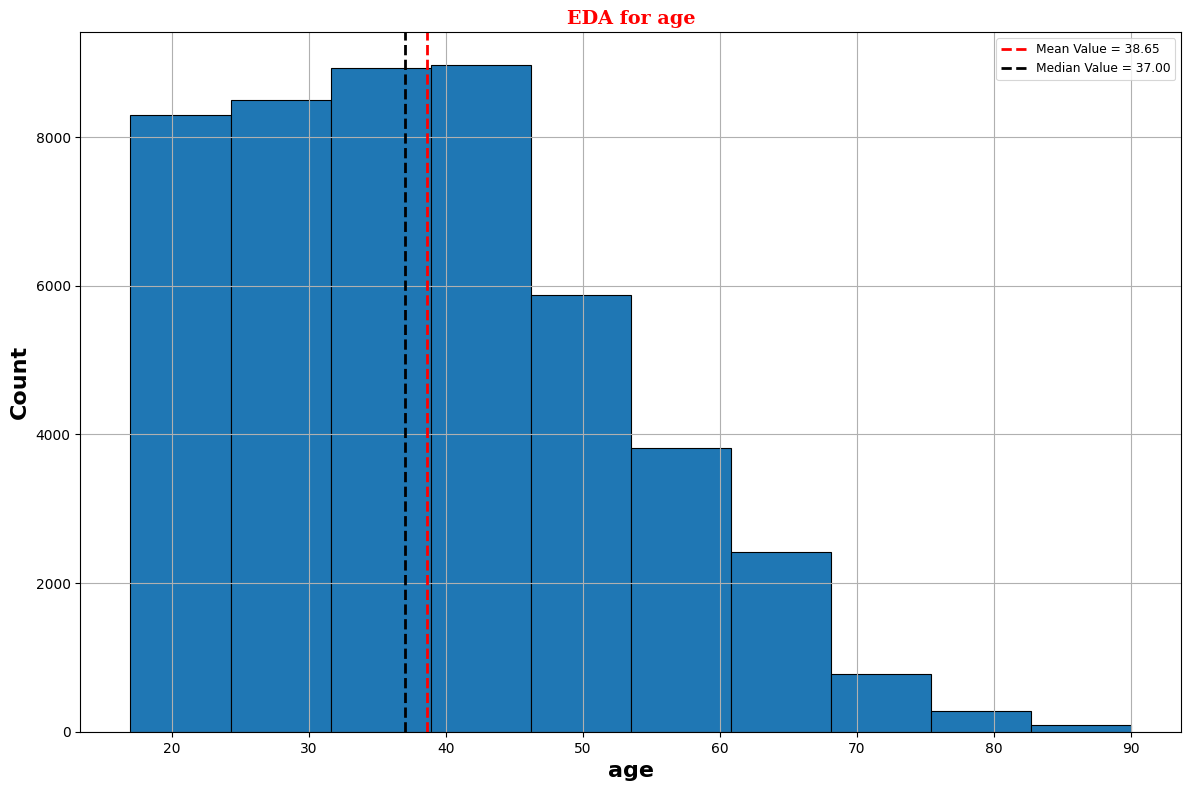


Total Ages above 70yo are: 858


In [22]:
plot_numeric(df,'age')

print(f'\nTotal Ages above 70yo are: {df[df["age"]>70].shape[0]}')

2. **Description about the distribution**

The above histogram shows that :

> "age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

* **Hours per week**
  1. **Distribution**

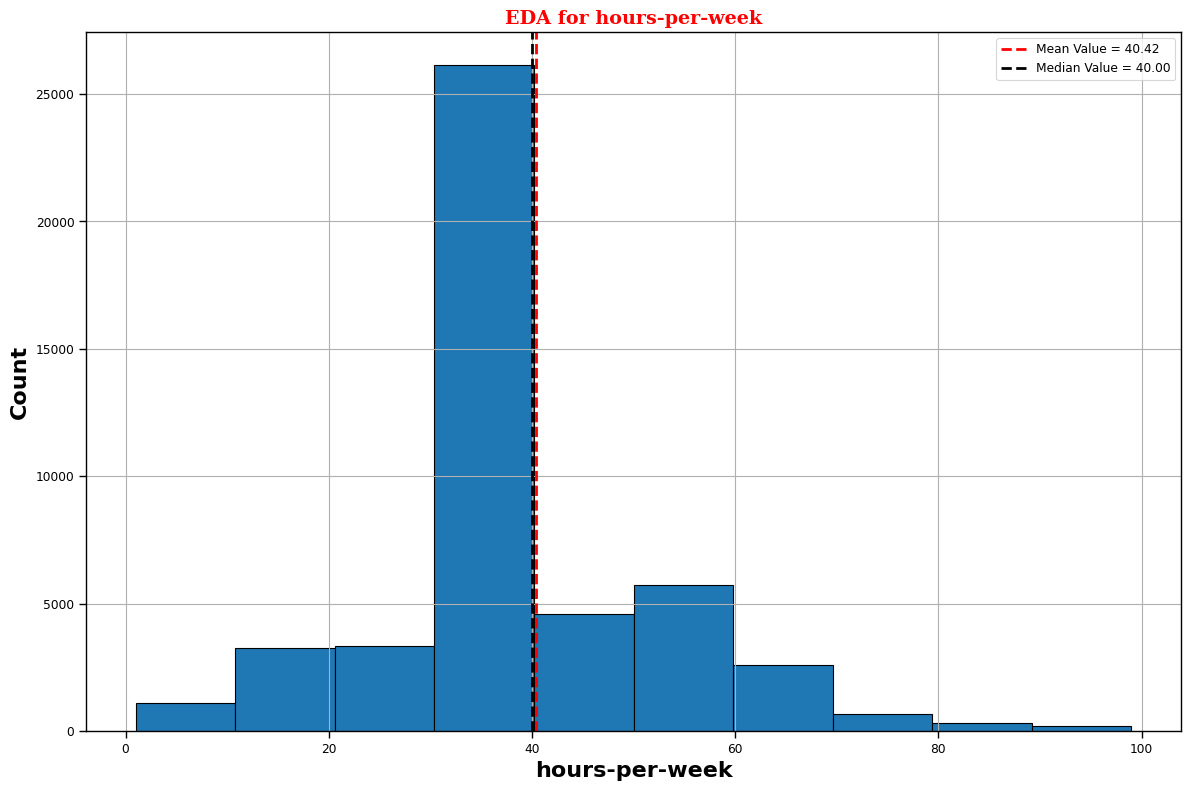

In [23]:
plot_numeric(df,'hours-per-week')

2. **Description about the distribution**

This histogram of "hours-per-week" shows that:

> In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are roughly 27,000 people.
There are also few people who works 80-99 hours per week and some less than 20 which is unusual.
75 percentage of the people spend 45 or less working hours per week.

* **fnlwgt**
  1. **Distribution**

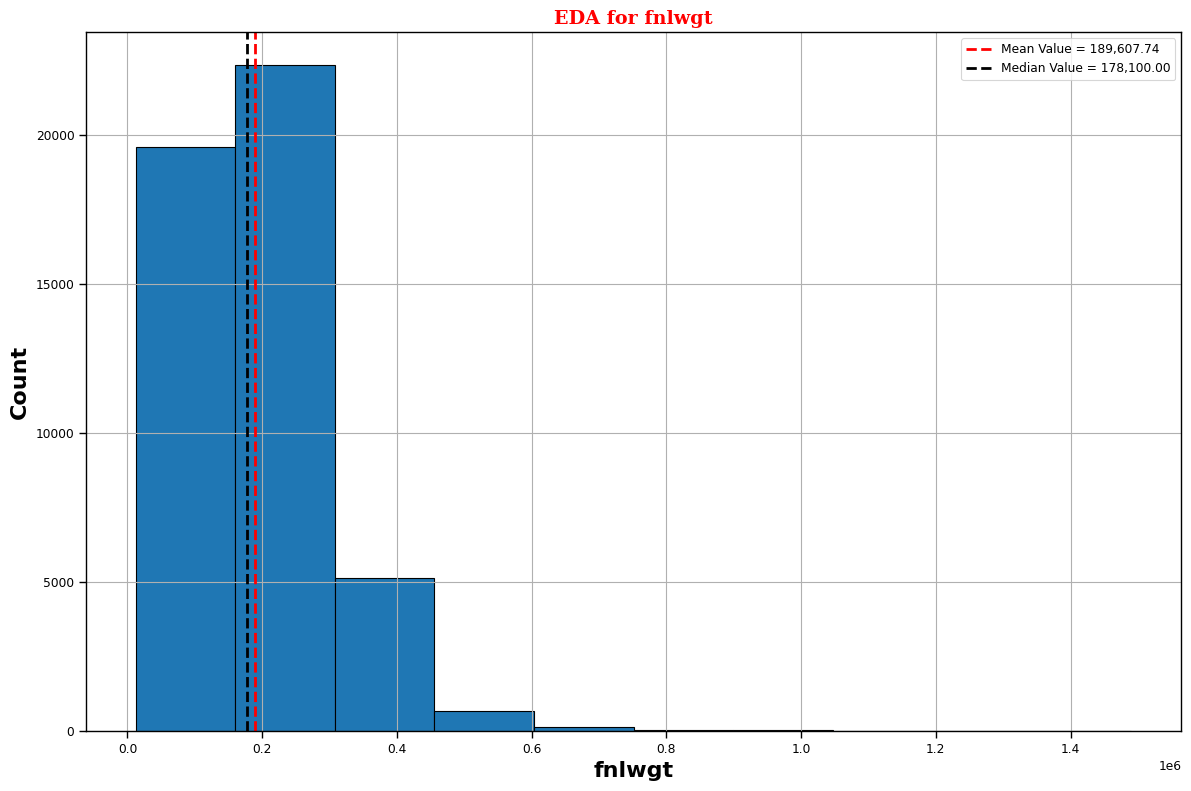

In [24]:
plot_numeric(df,'fnlwgt')

2. **Description about distribution**

The above histogram shows that :

* This is the sampling weight corresponding to the observations.
* The distribution of finalweight seems to be rightly skewed since mean(189,607) is greater than median(178,100).

* **capital-gain**
  1. **Distribution**

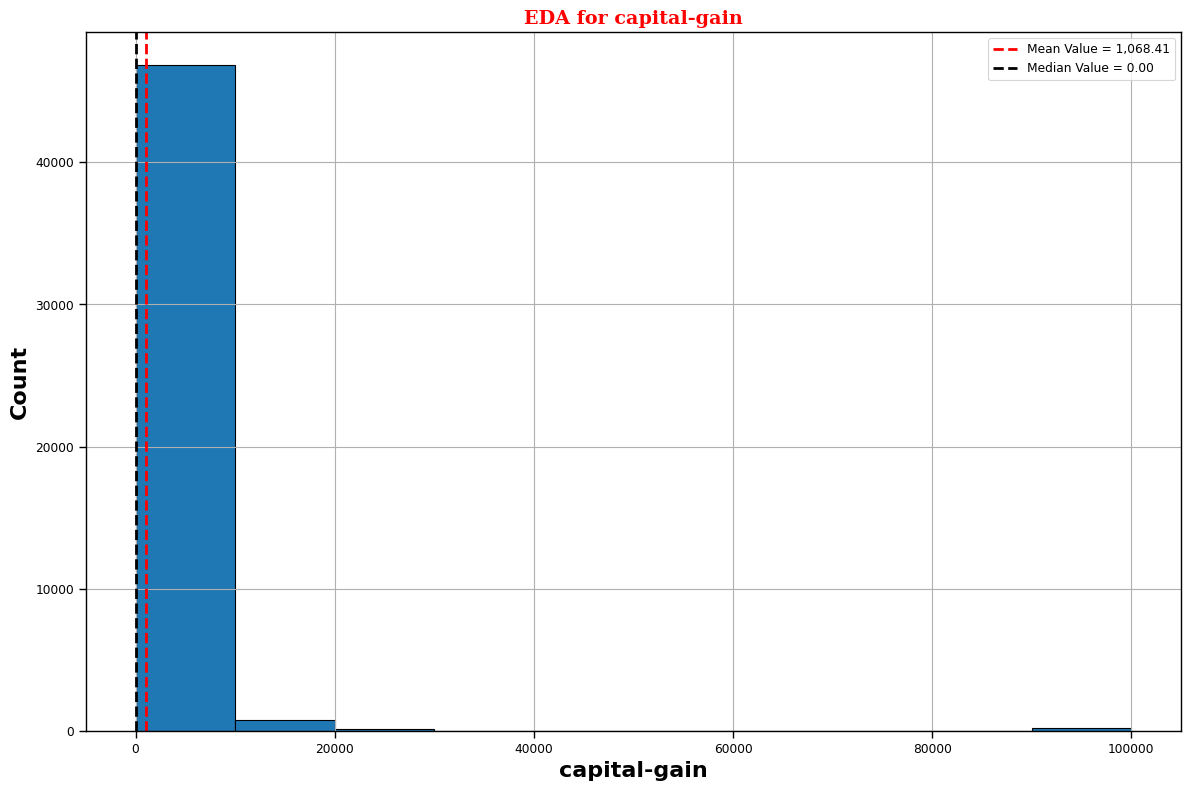

In [25]:
plot_numeric(df,'capital-gain')

2. **Description about distribution**

> This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.

> capital-gain is concentrated on the one particular value and other are spread with large standard deviation(7377.10).

> capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

* **capital-loss**
  1. **Distribution**

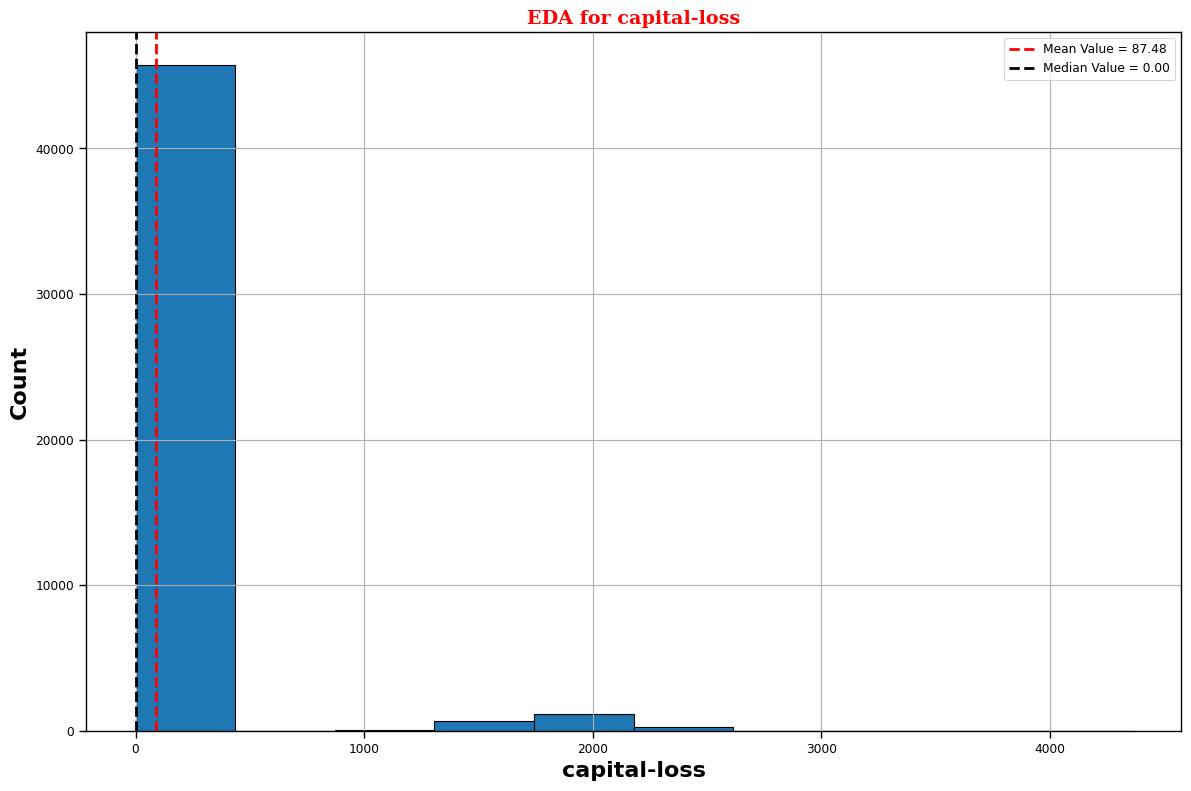


Total number of persons having a capital-loss above 0: 2239


In [26]:
plot_numeric(df,'capital-loss')

print(f'\nTotal number of persons having a capital-loss above 0: {df[df["capital-loss"]>0].shape[0]}')


2. Description about distribution

> This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2239).

> This attribute is similar to the capital-gain i.e. most of the values are centered on 0(around 45000 of them)

* **Relation between capital gain and capital loss**

  1. Let's explore more about capital loss and capital gain.

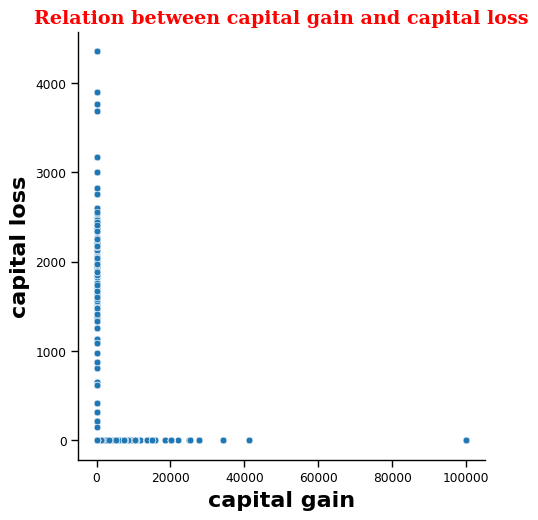

In [27]:
sns.relplot(data= df,x='capital-gain',y='capital-loss')

plt.ylabel('capital loss', fontsize = 16,fontweight='bold')
plt.xlabel('capital gain', fontsize = 16,fontweight='bold')
plt.title('Relation between capital gain and capital loss',
             fontfamily='serif',
             fontsize='x-large',
             fontweight='semibold',
             color='red')
plt.show()

2. Possibilities for capital gain and capital loss

> Both capital gain and capital loss can be zero
> If capital.gain is zero there is possibility of capital loss being high or above zero.
> If capital loss is zero there is possibility of capital.gain being high or above zero.

**With the help of this, we can do one modification later(It could be combine these together : `capital-change = [capital-gain - capital-loss])`**

-----

### **Univariate analysis for categorical features**

* **Workclass**
  1. **Distribution**

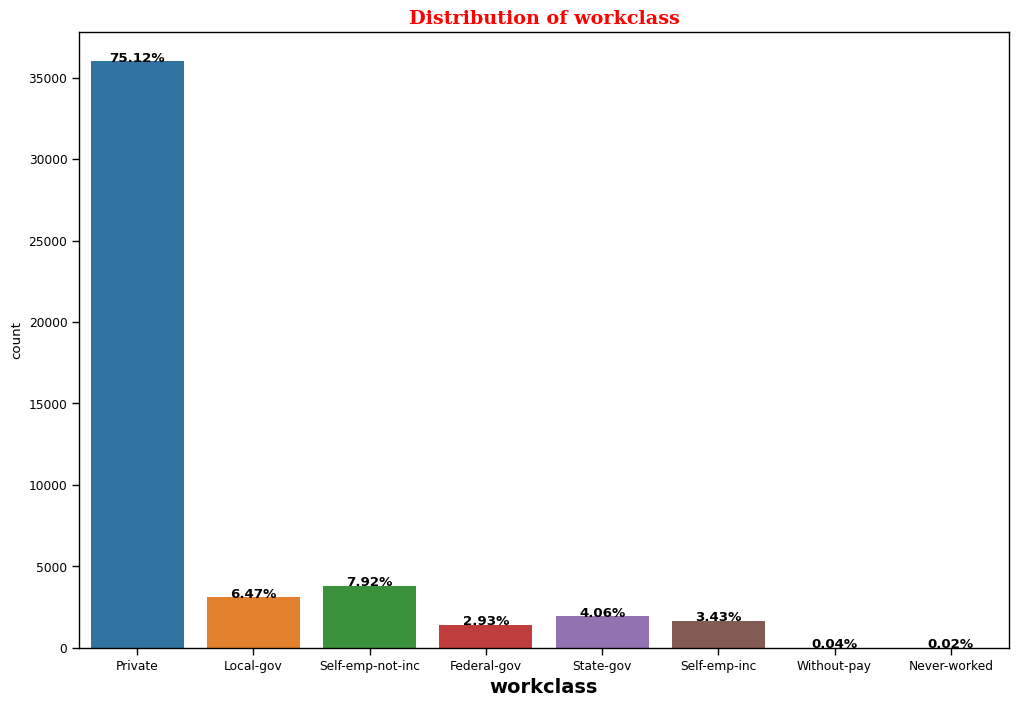

In [28]:
cat_univ_vis(df,'workclass')

2. **Description about distribution**

Summary distribution shows that:

* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the private workclass(36011) i.e. 75.12%.
* without-pay and never-worked has minimum count in workclass attribute(less than 5%).
* There is huge imbalance in the categories of workclass attribute.

* **Education**
  1. **Distribution**

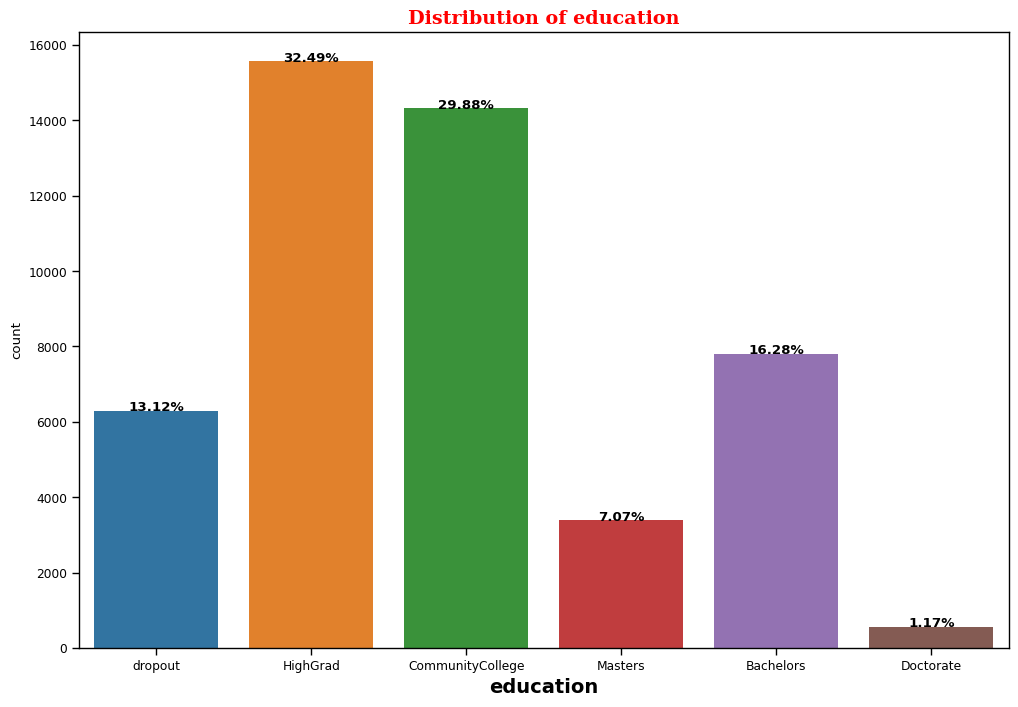

In [29]:
cat_univ_vis(df,'education')

2. **Description about distribution**

* There are 6 unique categories present in the education attribute(after modification).
* HighGrad has 32.49% of all the education attribute.
* HighGrad (15573) has the maximum number of observations followed by CommunityCollege(14324) and Bachelors(7803).
* Doctorate has the minimum number with only 562 having a doctorate (1.17%).

* **marital-status**
  1. **Distribution**

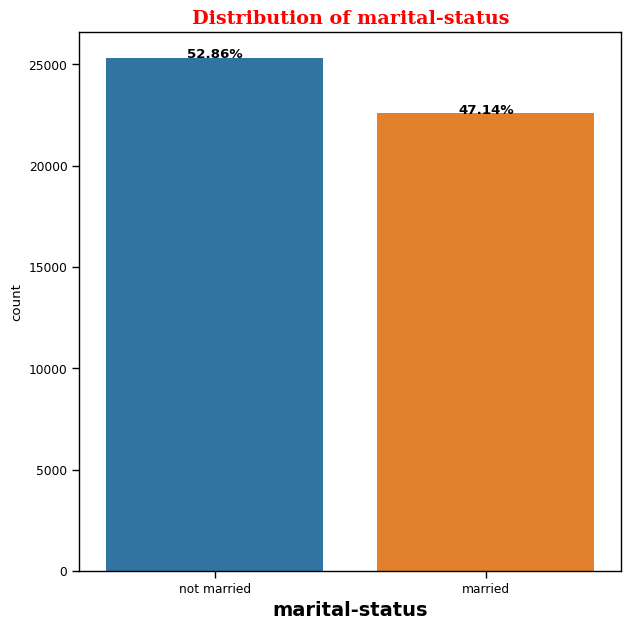

In [30]:
cat_univ_vis(df,'marital-status',0,(7,7))

2. **Description about distribution**

* This marital-status attribute has 2 unique categories(after modification).

*  The `not married` people represent the dominant category with 25345 (52.86%)

* `married` people are slightly less in number with 22589 (47.14%).


* **Occupation**
  1. **Distribution**

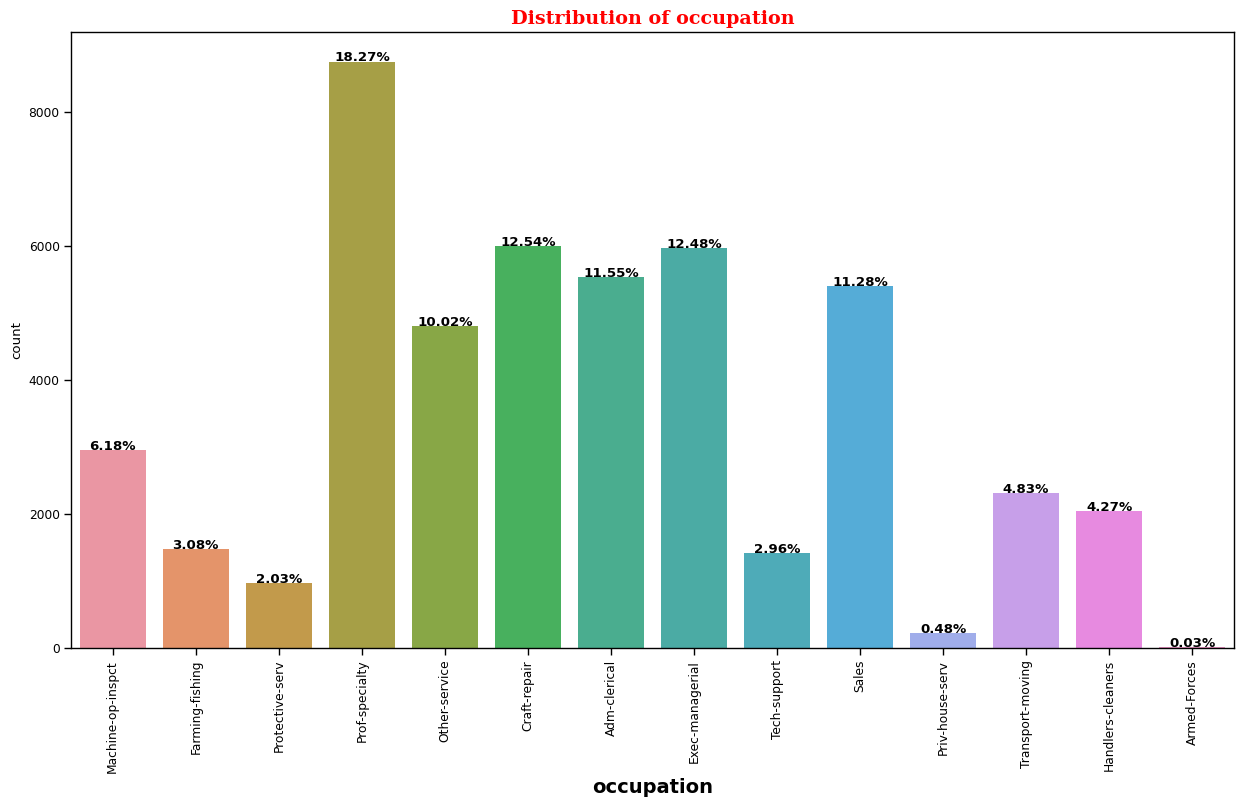

In [31]:
cat_univ_vis(df,'occupation',90,(15,8))

2. **Description about distribution**

* There are 14 unique categories present in the occupation attribute.
* Prof-specialty has the maximum count(8760) but Craft-repair, Exec-managerial, Adm-clerical and Sales has comparable number of observations (very close numbers and %).
* Armed-Forces has minimum samples in the occupation attribute with only 14 (0.03%).

* **Relationship**
  1. **Distribution**

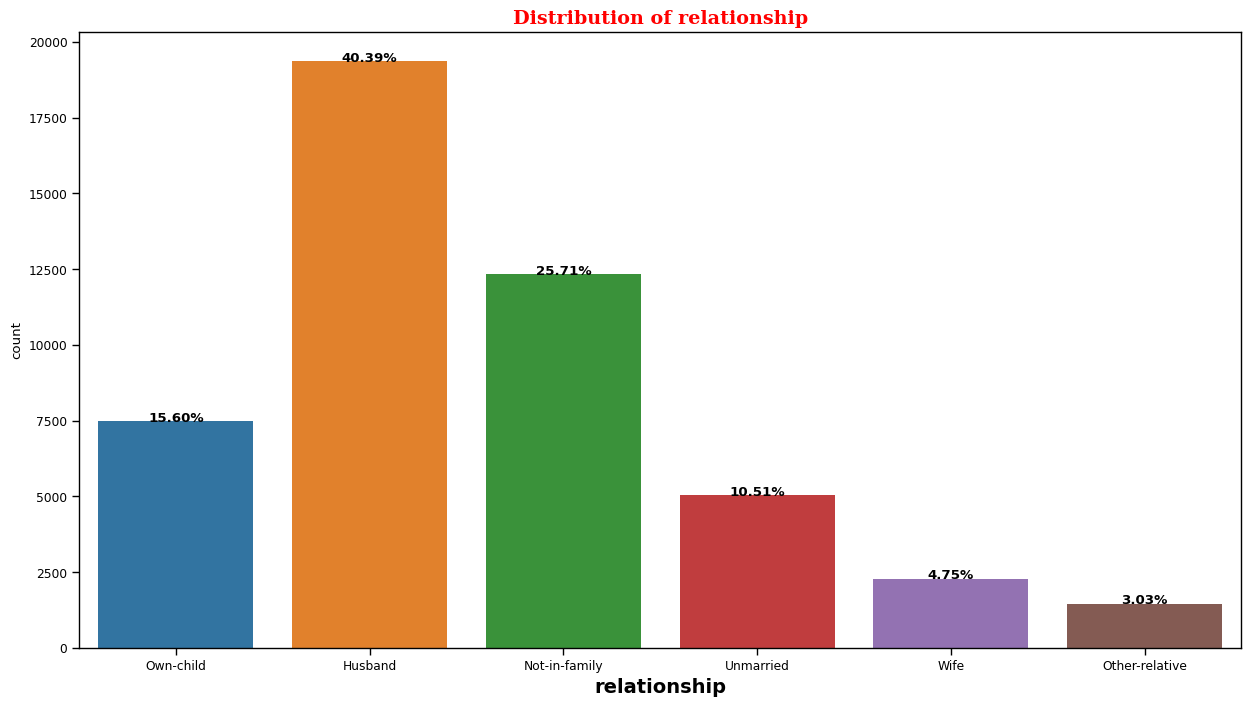

In [32]:
cat_univ_vis(df,'relationship',0,(15,8))

2. **Description about distribution**

* There are 6 unique categories in the relationship attribute.
* Husband has maximum percentage (40.39%) among all categories followed by not-in-family(25.71%)

* **Gender**
  1. **Distribution**

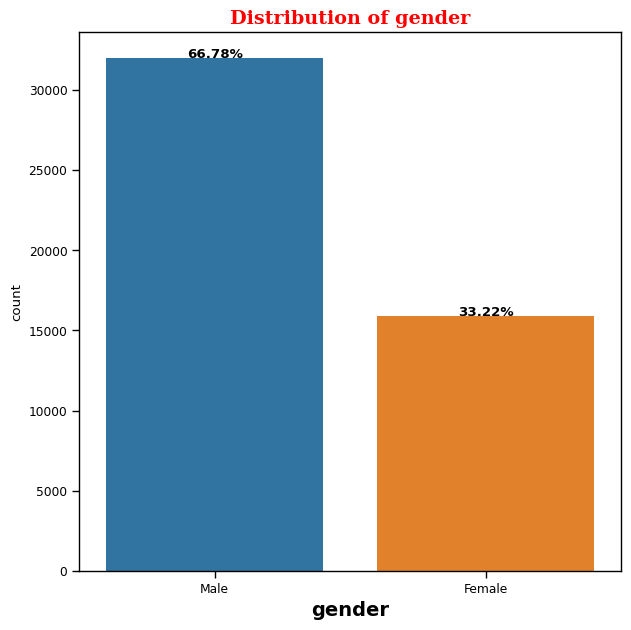

In [33]:
cat_univ_vis(df,'gender',0,(7,7))

2. **Description about distribution**

This distribution explains that:

* Gender has 2 unique categories(Male and Female).
* But the frequency of male(32006) is higher than the female(15928) categories.
* Distribution shows that this dataset is skewed toward the male with nearly 67%.

* **Native-country**
  1. **Distribution**

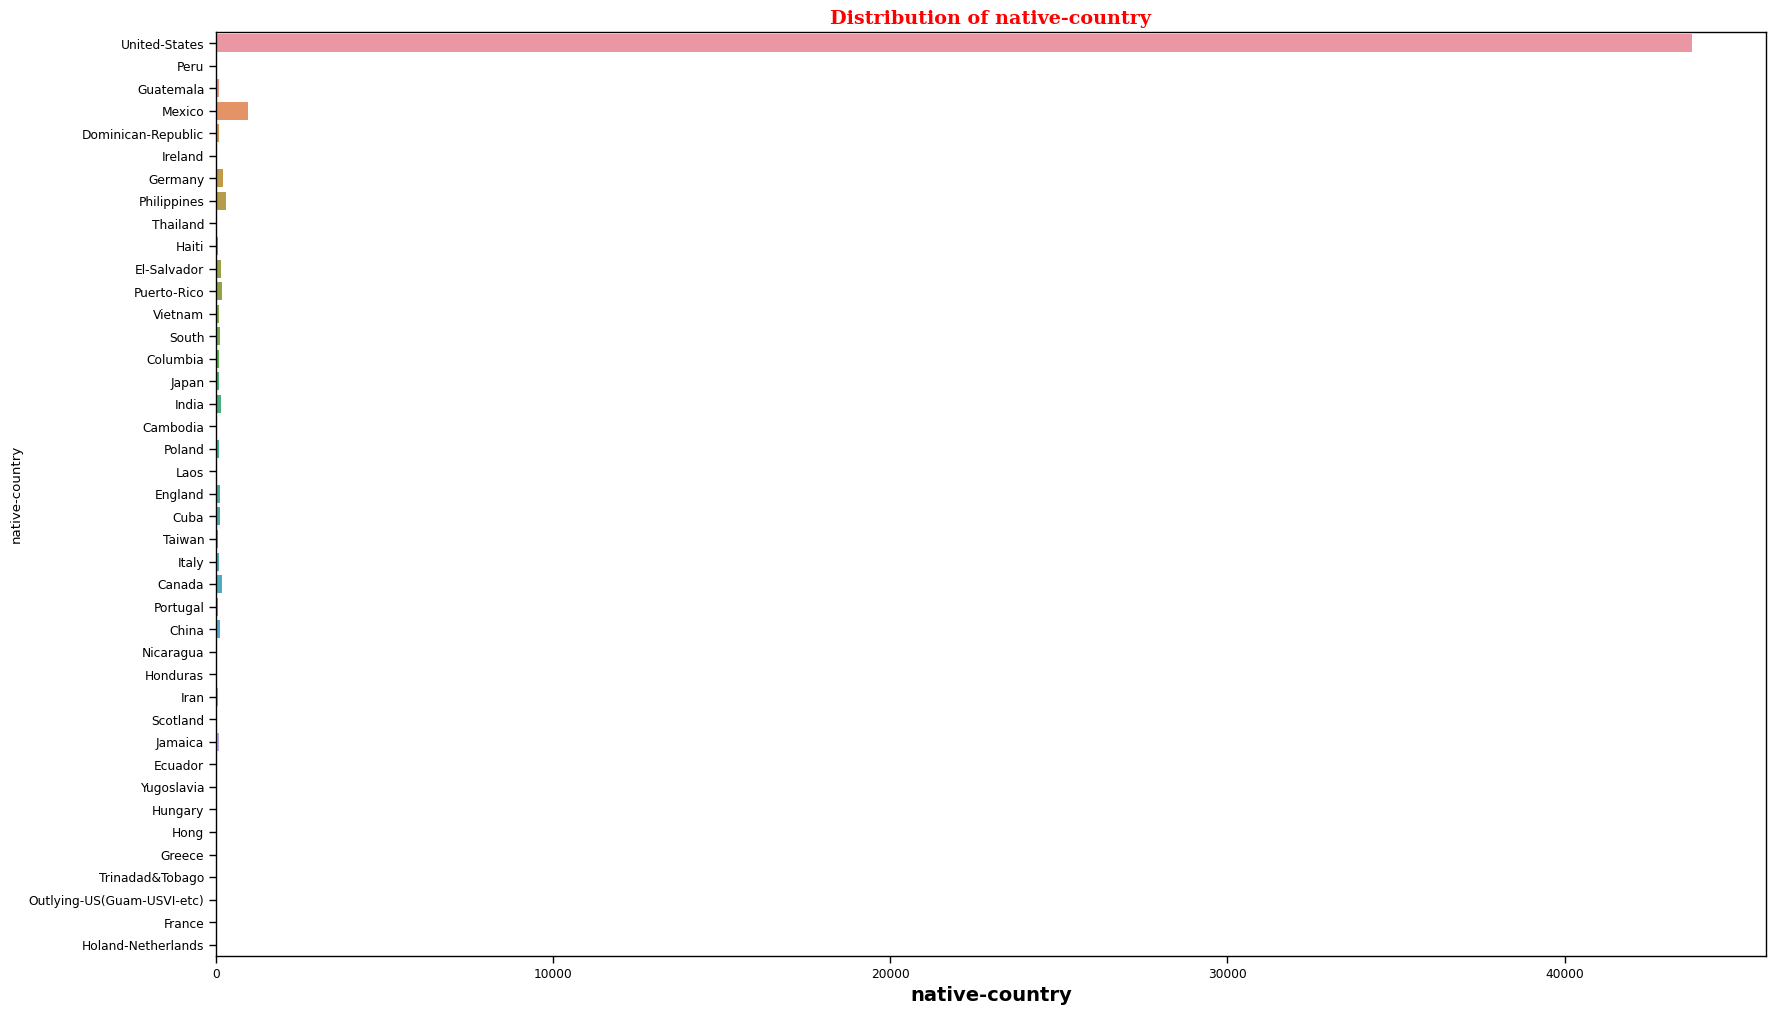

In [34]:
cat_univ_vis(df,'native-country',0,(20,12),1)

2. **Description about distribution**

This distribution explains that:

This dataset is **taken from the US**.
As 43792 of them (**`91.35%`**) have native country America and others are immigrants.


--------

* **Income(Target variable)**
  1. **Distribution**

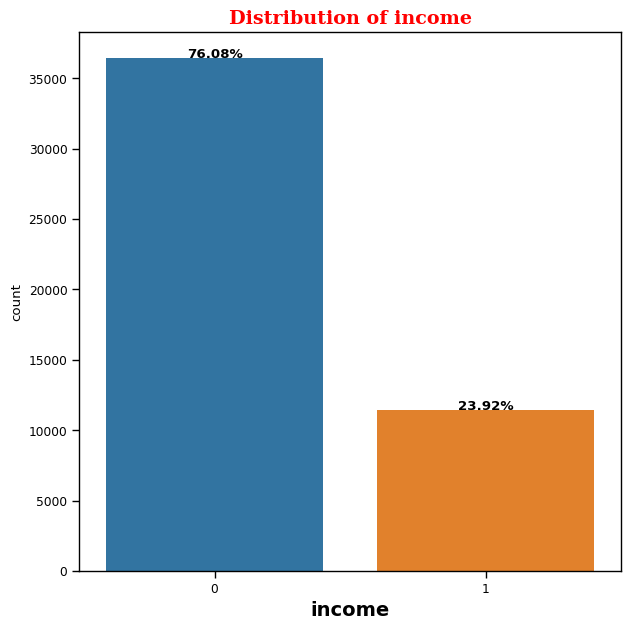

In [35]:
cat_univ_vis(df,'income',0,(7,7))

2. **Description about distribution**

This distibution says that:

> This dataset not balance , i.e. 23.92%of them are belong to income group 1 (who earns more than 50k) and 76.08% fall under the income group 0 (who earns less than 50k).

## **Part - 3**

### **Bivariate analysis**

### **Correlation among the numeric variables**

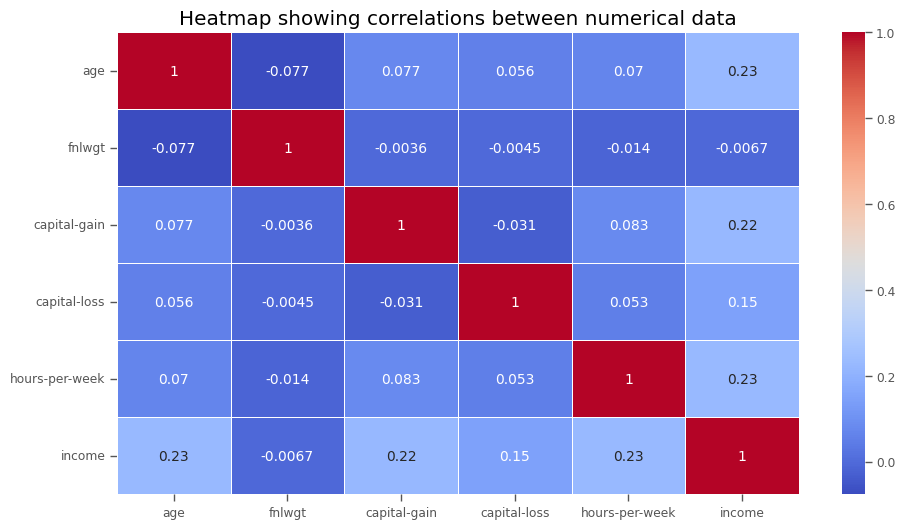

In [36]:
#creating a heat map
plt.style.use('ggplot')
plt.figure(figsize=(11, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,linewidths=.5, cmap='coolwarm')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

* **There is no strong correlation among the numeric attributes.**
* There is neither strong positive nor strong negative correlation present in any variable .
* The strongest correlation between the four numerical columns(without counting the target variable) is present between capital gain and hours-per-week with Coefficient .083.(which is less than 0.1 and that is a very small correlation among them).

* We can conclude from the heatmap above that **there is a small positive correlation between the target (income) and the other numerical variables.**

---

* **Age**
  1. **Boxplot (Relationship with income)**

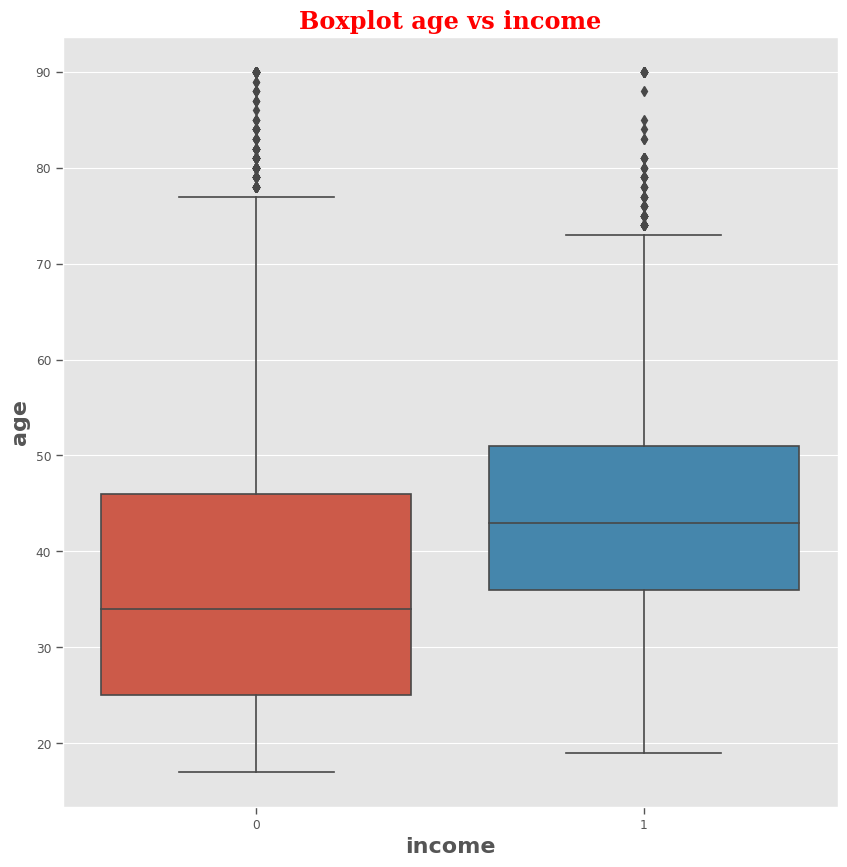

In [37]:
biv_box(df,"age")

In [38]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.28
0,0,36.88


* **The mean "age" for Income group(<=50k) is 36.8 years. And for Income group(>50k) is 44.2 years**

> We can conclude that there is a significant difference in the mean ages of income group **>50k** and income group **<=50k**.
It means that age has some contribution to the distinguish income groups.


  2. **Description about boxplot**

The above bivariate boxplot shows :

* Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
* Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
* Interquartile range(IQR) :
  * For Income group(<=50k) , IQR is between [25,46] (long range)
    > Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

* For Income group(>50k) , IQR is between [38,50] (shorter range)

---

* **Hours per week**
  1. **Boxplot (Relationship with income)**

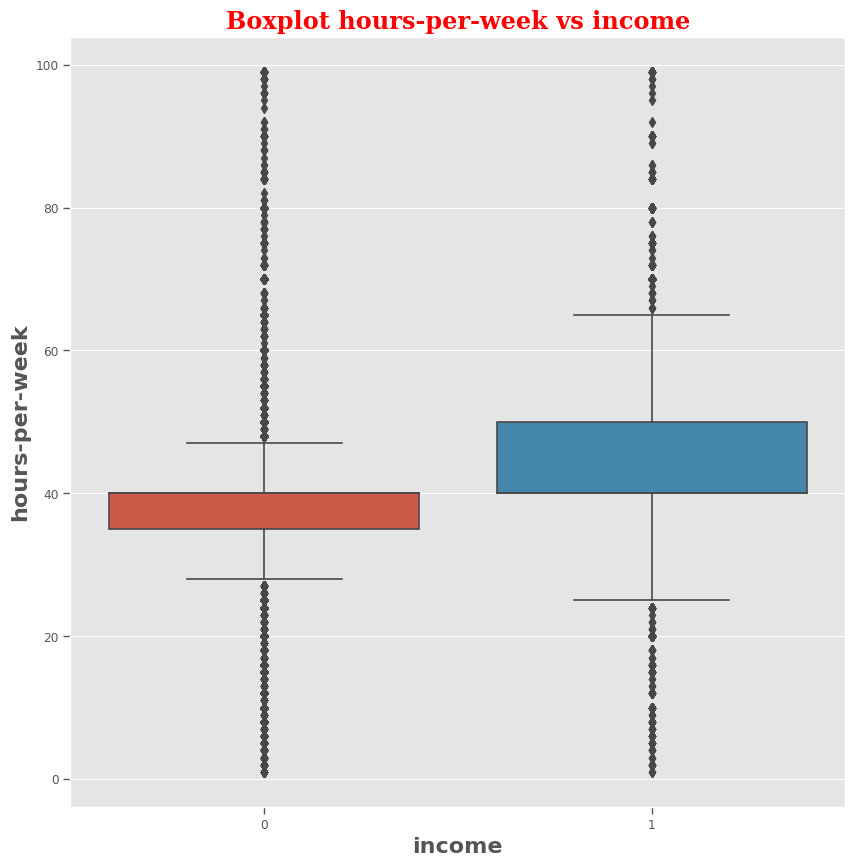

In [39]:
biv_box(df,"hours-per-week")

In [40]:
df[['income', 'hours-per-week']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,1,45.46
0,0,38.83


* **We can conclude that there is difference in Mean of income group >50k and income group <=50k. It means that hours-per-week has some contribution to the distinguish income groups.**

  2. **Description about boxplot**

Bivariate Analysis with the boxplot shows that:

* The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

  **Interpretation :**

    * Income group who earns >50k has spend ~ 44 "hours-per-week".(long hours)
    * Income group who earns <=50k has spend ~ 37 "hours-per-week".

* The boxplot for Income group who earns <=50k has smaller range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) compared to the boxplot for Income group who earns >50k that has larger range.

  **Interpretation :**

    * Income group who earns >50k have flexible working hours
* More Outliers present in the Income group who earns <=50k.

----


* **fnlwgt**
  1. **Boxplot (Relationship with income)**

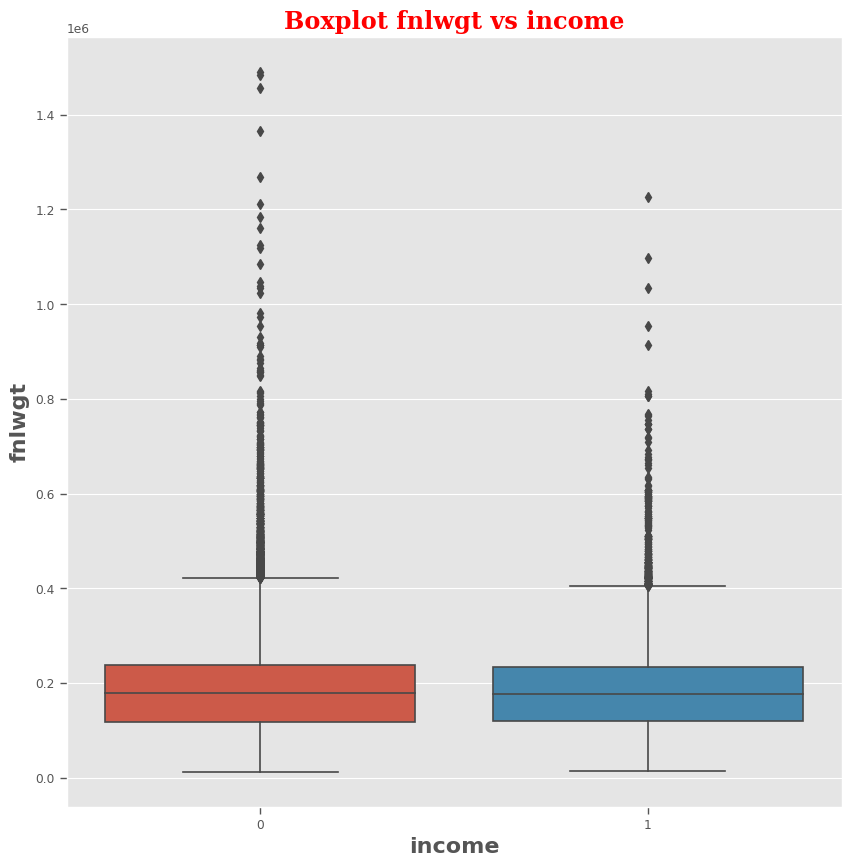

In [41]:
biv_box(df,"fnlwgt")


2. Description about boxplot
* As evident from the above plot, both income group has nearly same IQR and median is centered on 0.
* Outliers are present in both the income groups.
* It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

--------
------

* **Workclass**

  1. **Plot (Relationship with income)**

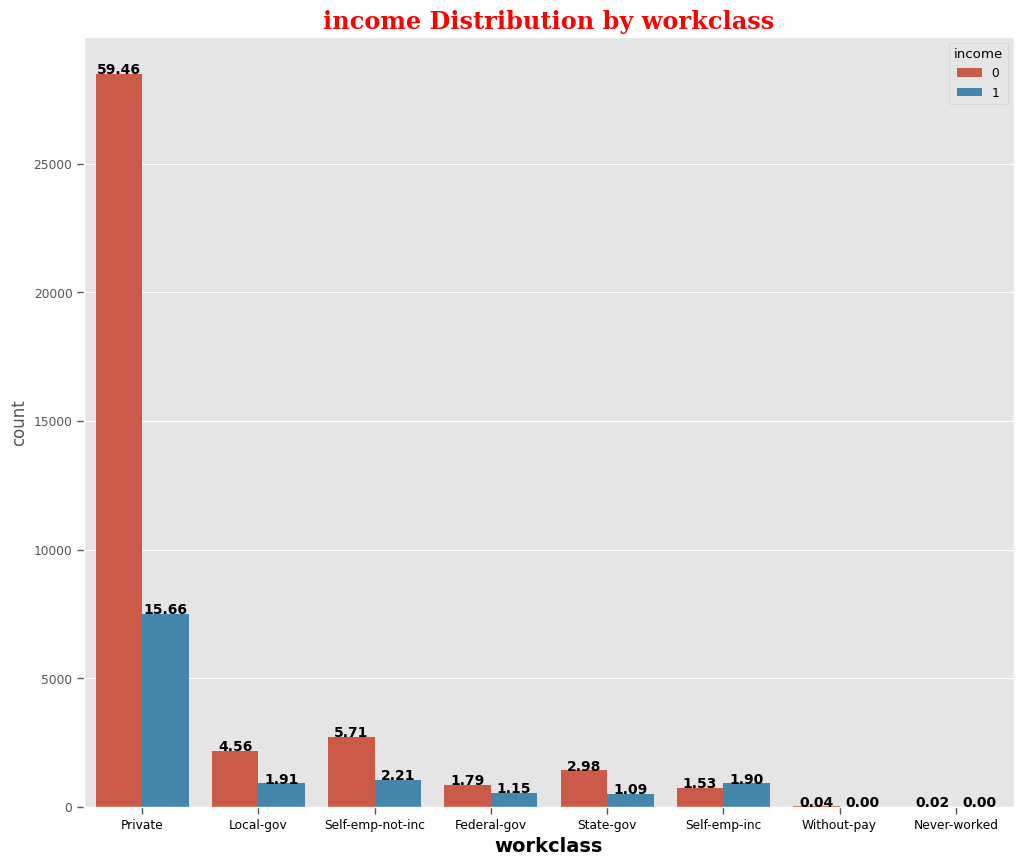

In [42]:
biv_plot(df,"workclass")

  2. **Description about plot**

This plot shows that:

* In private workclass most of the people(59.46%) earn <=50k(belong to income group 0).
* self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
* In Federal-gov workclass nearly more than half of the people earn >50k.

* **Education**

  1. **Plot (Relationship with income)**

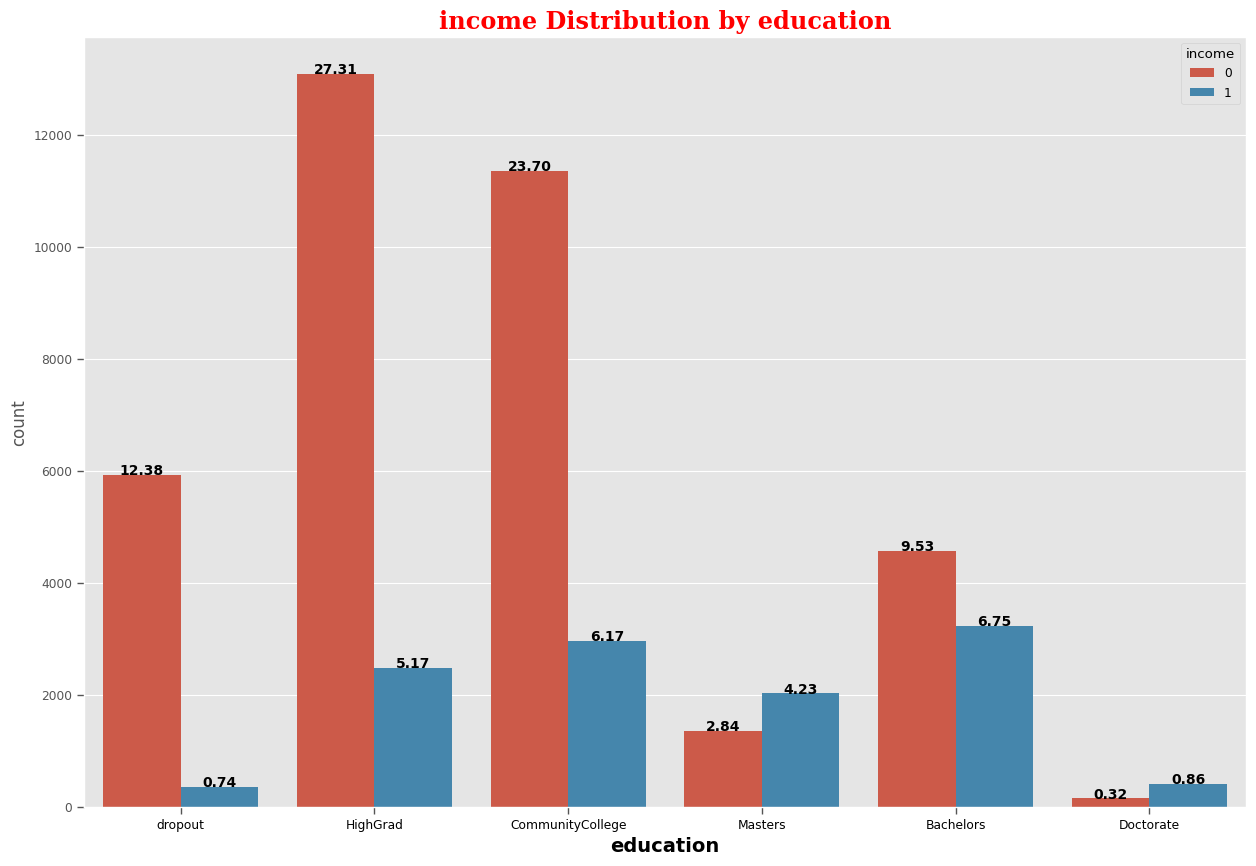

In [43]:
biv_plot(df,"education",(15,10))

  2. **Description about plot**

This plot shows that:

* Despite the fact that most of the categories fall under the HighGrad but the interesting thing is only 5.17% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.75%.
* There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0. These are masters and doctorate.
* **`We can also infer that higher eduction may provide better earnings.`**

* **Marital-status**

  1. **Plot (Relationship with income)**

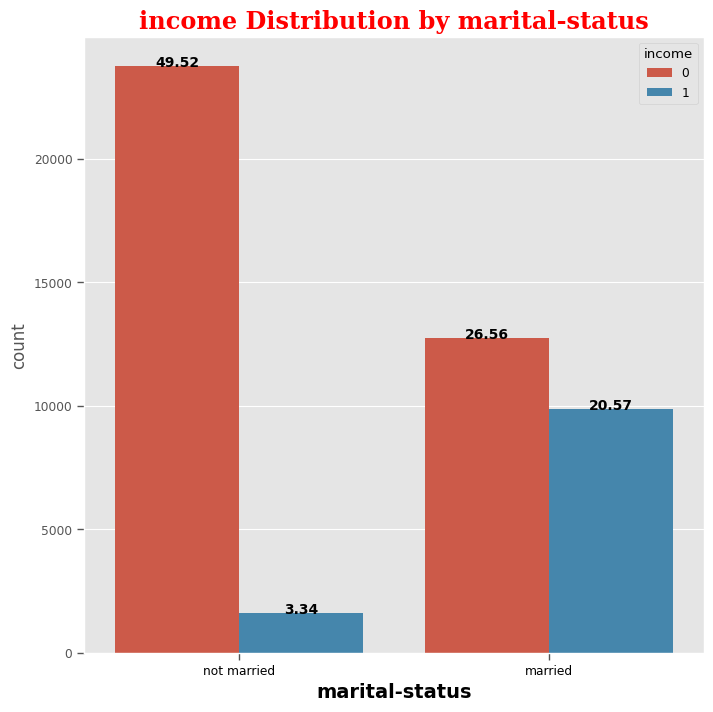

In [44]:
biv_plot(df,"marital-status",(8,8))

  2. **Description about plot**

This countplot explain following things:

* Beeing **married** has the highest percentage(20.57%) of falling under the income group 1(>50k). And **not married** people has only 3.34% chance of falling under the income group 1(>50k).

* **not married** people has the highest percentage(49.52%) of falling under the income group 0 (< 50k).And **married** people has (26,56%) chance of falling under the income group 0(< 50k).  


* **Occupation**

  1. **Plot (Relationship with income)**

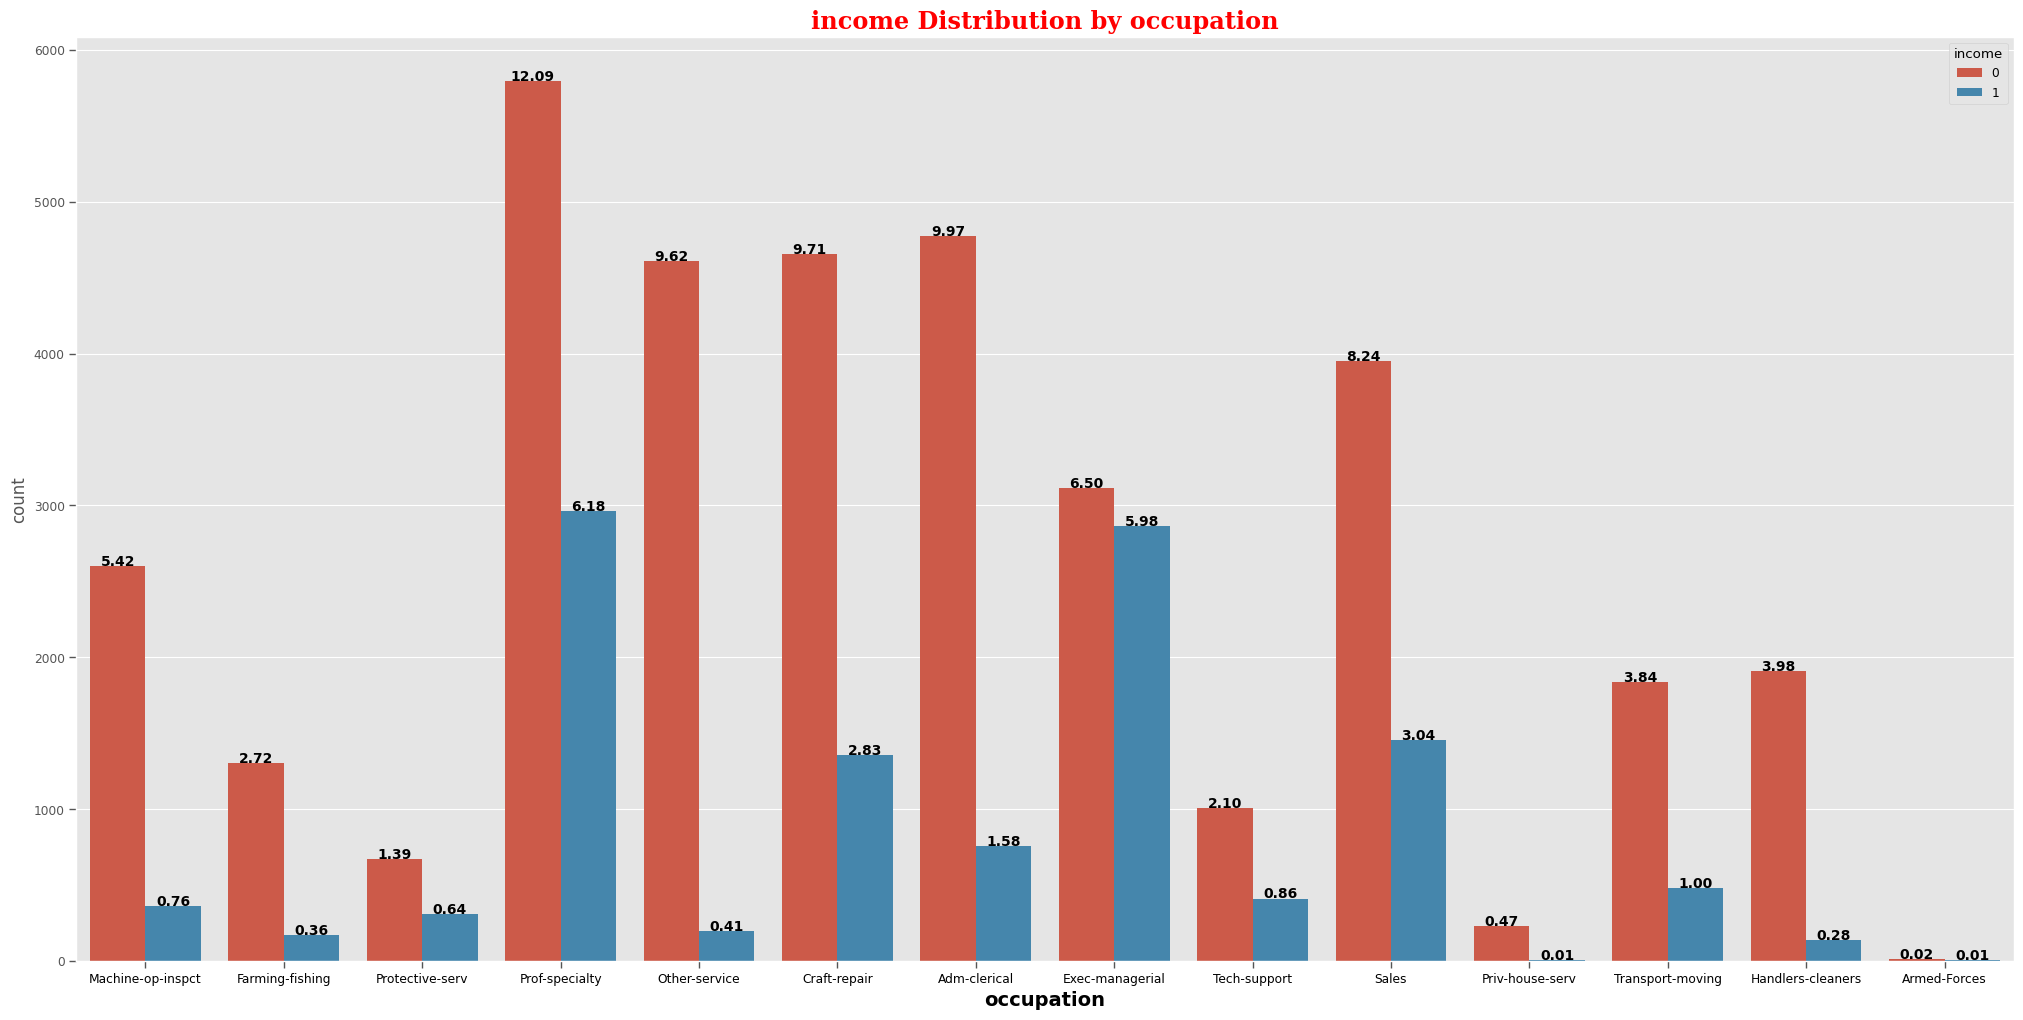

In [45]:
biv_plot(df,"occupation",(25,12))

  2. **Description about plot**

This countplot explain following things:

* Prof-specialty has maximum percentage that fall in both income group 0 and 1 compared to all other categories with (12.09%) and (6.18%) respectively.

* For the "other-service" occupation, We can observe a huge difference in percentage between both income group 0 and 1 compared to all other categories with (9.62%) and (0.41%) respectively. Group 0 of people who earn less than 50k is much higher than group 1.

* There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. **In every occupation, people who earn less than 50k is greater than people who earn (>50k)**.

* **Relationship**

  1. **Plot (Relationship with income)**

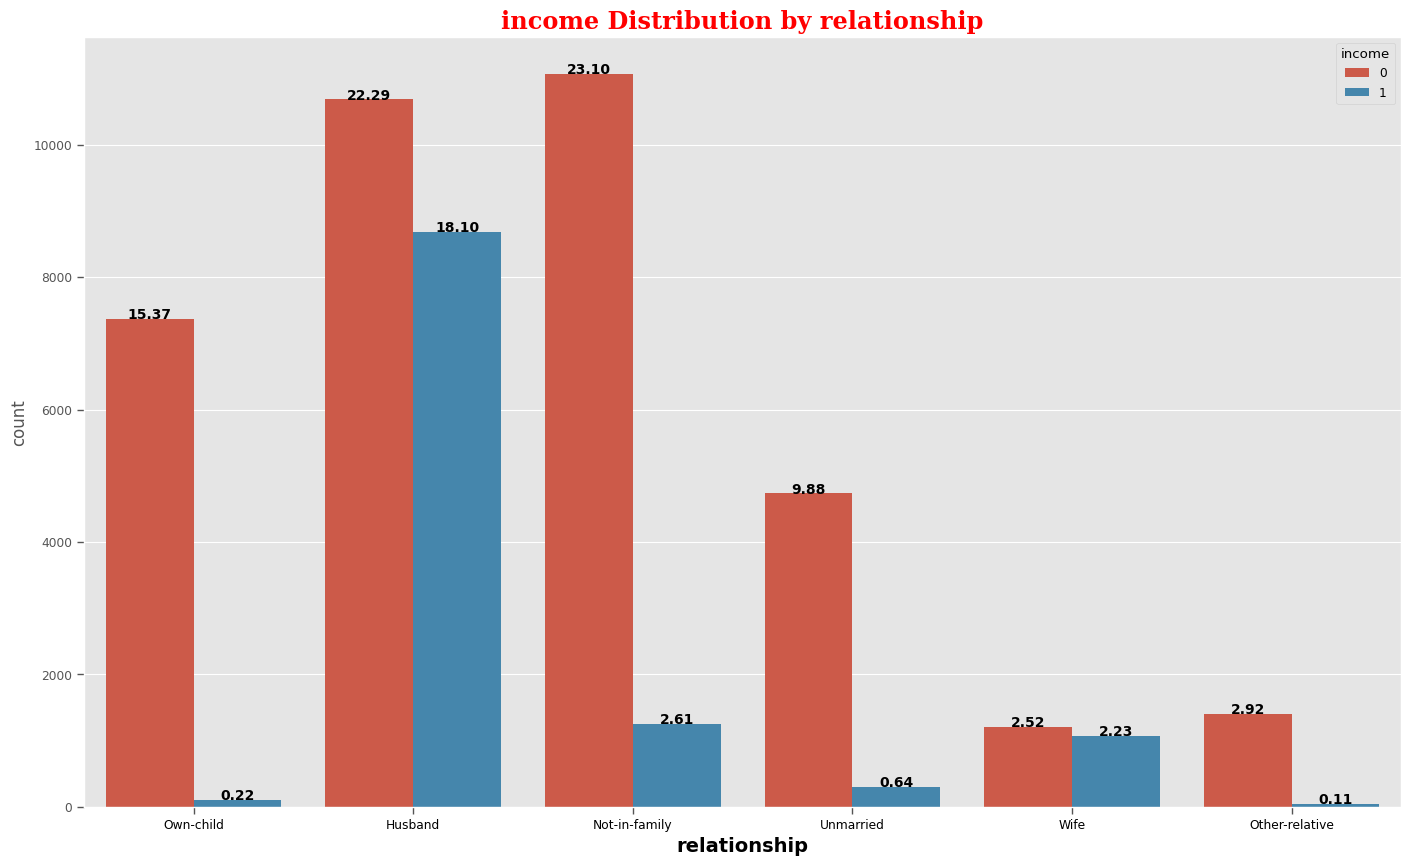

In [46]:
biv_plot(df,"relationship",(17,10))

 2. **Description about plot**

This countplot explain following things:

* **husbands has the highest percentage(18.10%) of earning more than 50k compared to all the other categories.**

* One thing to notice is that "not-in-family" has highest percentage(23.10%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.23%) category. This comparsion is done due to fact that "wife" category has only 2.52% to fall under the income group 0.

* "own-child" and "other-relative" has the minimum percentage to fall under the income group 1, (0.22%) and (0.11%) respectively.

* There is a **huge difference** between the percentage of fall either groups except for the "husband" and "wife" categories.

* **Gender**

  1. **Plot (Relationship with income)**

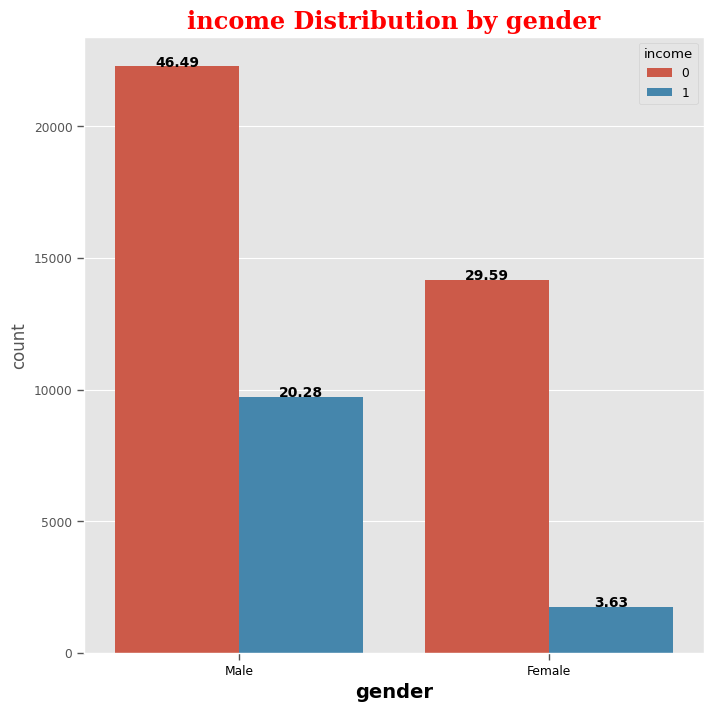

In [47]:
biv_plot(df,"gender",(8,8))

  2. Description about plot

This countplot explain following things:

* For "female" earning more than 50k is rare with only 3.63% of all observations.

* But for male, 20.28% of all people earn more than 50k.

------

## **Some multivariate relationships**


1. **Multivariate Analysis between "income", "hours-per-week", "gender"**

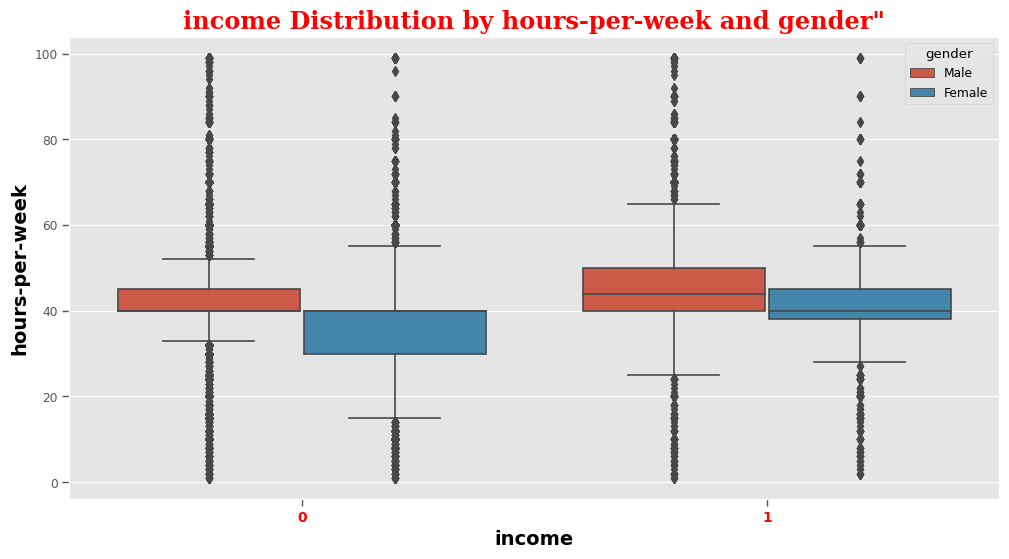

In [48]:
mult_analysis(df,'hours-per-week','gender',(12,6))

* The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
* Boxplot range for Income group who earns <=50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] is larger for the Male Category:

**Interpretation**

> **Females have more flexible working hours per week in the income groups who earns <=50k**

* Boxplot range for Income group who earns >50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] is larger for the Female Category:

**Interpretation**

 > **Males have more flexible working hours per week in the income groups who earns <=50k**

 -----

1. **Multivariate Analysis between "income", "age", "gender"**

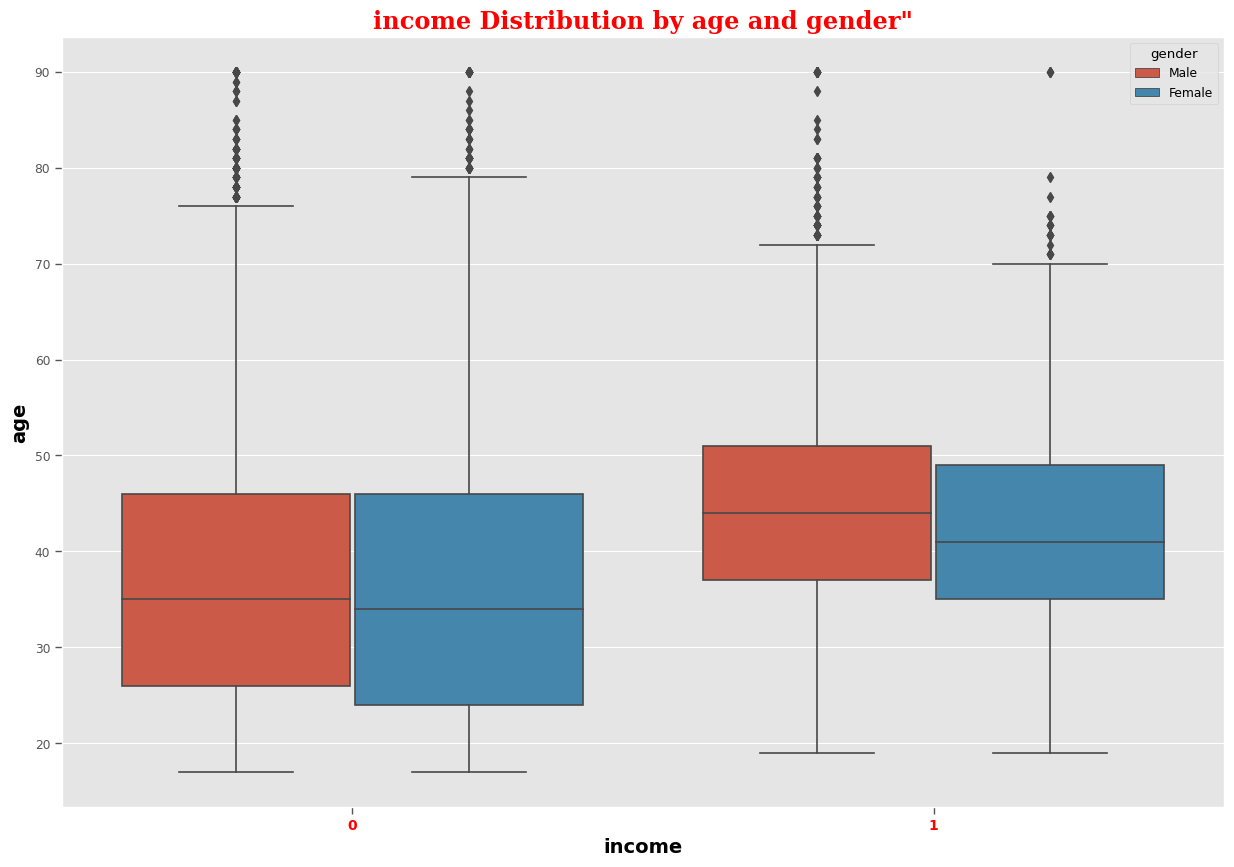

In [49]:
mult_analysis(df,'age','gender',(15,10))

The boxplots above shows that:

* Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k (very small difference of 1year or less) .

* But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.

## **Overall conclusion of Complete EDA**

----------
-------

1. This dataset not balance , i.e. 23.91%of them are belong to income group 1 (who earns more than 50k) and 76.09% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week.

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.63% of all observations.
   But for male, 20.28% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

9. People having doctorate and masters degrees are making salary more than 50K(it can be concluded that higher education means more salary).

-------
--------

## **Part - 4 MODELING**

------
-------

**We are now entering the model development phase of the project!**

### **Ensuring that all the appropriate pre-processing steps are completed.**

In [50]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,dropout,not married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,0
1,38,Private,89814,HighGrad,married,Farming-fishing,Husband,Male,0,0,50,United-States,0
2,28,Local-gov,336951,CommunityCollege,married,Protective-serv,Husband,Male,0,0,40,United-States,1
3,44,Private,160323,CommunityCollege,married,Machine-op-inspct,Husband,Male,7688,0,40,United-States,1
4,18,Private,103497,CommunityCollege,not married,Prof-specialty,Own-child,Female,0,0,30,United-States,0


In [51]:
df_copy = df.copy()

> **after reviewing the code above, all the steps of data cleaning and preparation before the split of the data have been done successfully**

In [52]:
#creating a list of object columns
categorical_columns = list(df.select_dtypes(include='object'))

#Encoding categorical variables (using label encoding)
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['income'])
y = df['income']

# Feature scaling
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data, while X_test and y_test contain the testing data.

In [53]:
X_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
8764,-1.07,-1.89,2.02,-0.75,0.94,-1.55,0.97,-1.42,-0.14,-0.22,0.61,0.26
39880,0.90,-2.79,0.61,1.08,0.94,1.22,1.60,0.71,-0.14,-0.22,0.77,-4.84
11870,0.03,-0.09,-0.78,-0.75,-1.06,1.22,-0.90,0.71,0.45,-0.22,0.37,0.26
18986,0.10,-0.09,0.28,0.47,0.94,1.47,1.60,-1.42,-0.14,-0.22,-0.03,0.26
5487,1.92,0.81,-0.70,0.47,0.94,1.22,-0.28,-1.42,0.77,-0.22,-0.03,0.26


In [54]:
X_train.shape

(38338, 12)

In [55]:
X_test.shape

(9585, 12)

## **1) Modeling**

## **1) Logistic Regression:**

Training set Evals :

accuracy is 0.820.
recall is 0.444.
precision is 0.688.
------------------------------------------------------------
Test set Evals :

accuracy is 0.817.
recall of is 0.441.
precision of is 0.696.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7254
           1       0.70      0.44      0.54      2331

    accuracy                           0.82      9585
   macro avg       0.77      0.69      0.71      9585
weighted avg       0.80      0.82      0.80      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


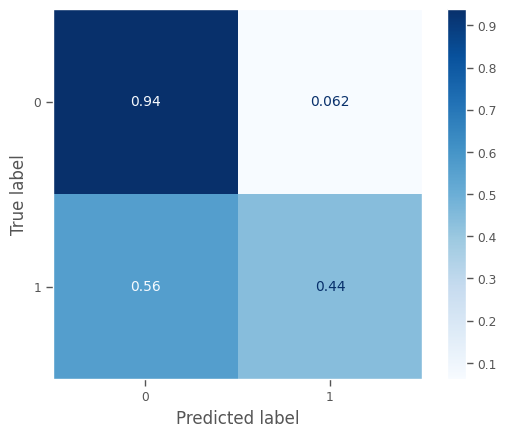

In [56]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

#Call the function to evaluate the model
metrics_eval_model()



**Interpretation: Classification Report**
----------

* The model performs well in predicting individuals with income <=50K (class 0) with high precision (0.84) and recall (0.94).
* However, the model's performance is weaker in predicting individuals with income >50K (class 1) as indicated by the lower precision (0.70) and recall (0.44).
* The F1-score for class 0 is high (0.89), suggesting a good balance between precision and recall for this class.
* The F1-score for class 1 is lower (0.54), indicating an imbalance between precision and recall for class 1.
> **Overall, the model's accuracy of 82% suggests it makes correct predictions for the majority of the test samples, but it may benefit from improvements in predicting the higher-income group (class 1). Depending on the specific problem and business goals, you might want to consider additional model tuning or data balancing techniques to improve performance for class 1.**

**Interpretation: Confusion Matrix**
----------

* The high True Negative Rate (94%) indicates that the model is quite accurate at correctly identifying individuals with income <=50K as such.

* The high False Negative Rate (56%) suggests that there is a substantial rate of misclassification where individuals with income >50K are incorrectly predicted as having income <=50K. This is a type II error, and improving this rate may be a priority if you want to capture more individuals with higher incomes.

* The low False Positive Rate (6.2%) indicates that the model makes relatively fewer false predictions where individuals with income <=50K are incorrectly predicted as having income >50K.

* The low True Positive Rate (44%) shows that the model is less accurate at correctly identifying individuals with income >50K as such. There is room for improvement in this aspect of the model's performance.

> **In summary, the model is good at identifying lower-income individuals but needs improvement to better capture higher-income individuals while minimizing false predictions of lower income.**

---

### **Tuning:**

In [57]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], # Regularization parameter
              'penalty':['l1', 'l2'], # Regularization penalty (L1 or L2)
              'solver': ['liblinear','saga', 'lbfgs'] # Solver for optimization
              }

In [59]:
lr_grid_search = GridSearchCV(logreg, param_grid)

In [60]:
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']})

In [61]:
lr_grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

### **Best model evalution:**

In [62]:
best_model = lr_grid_search.best_estimator_

Training set Evals :

accuracy is 0.820.
recall is 0.444.
precision is 0.689.
------------------------------------------------------------
Test set Evals :

accuracy is 0.817.
recall of is 0.441.
precision of is 0.696.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7254
           1       0.70      0.44      0.54      2331

    accuracy                           0.82      9585
   macro avg       0.77      0.69      0.71      9585
weighted avg       0.80      0.82      0.80      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


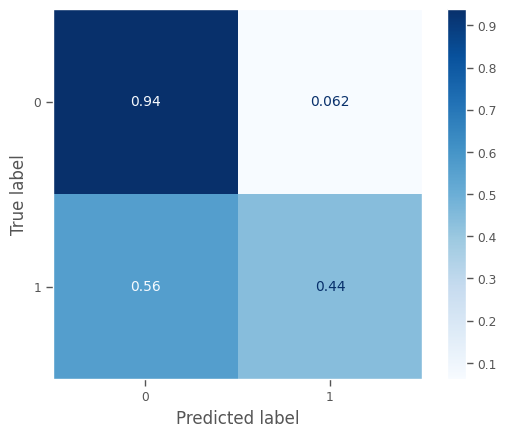

In [63]:
logreg_pipe1 = make_pipeline(best_model)

logreg_pipe1.fit(X_train,y_train)

train_pred = logreg_pipe1.predict(X_train)
test_pred = logreg_pipe1.predict(X_test)

metrics_eval_model()

**Training metrics and testing metrics are almost equal. no undefit or overfit problem.**

### **Original Model vs. Tuned Model:**
**Interpretation: Classification Report**
----------

* Both the original and tuned logistic regression models achieved similar accuracy, recall, and precision on both the training and test sets, with approximately 82% accuracy, 44% recall, and 69-70% precision for class 1 (income >50K).

* **The Logistic Regression model's performance remains consistent after hyperparameter tuning on both the training and test sets.**

* The accuracy of the model remains at 81.72% after tuning.
* The recall for individuals with income <=50K (class 0) is high at 94%, indicating the model's ability to correctly identify lower-income individuals while maintaining precision at 84%.
* For individuals with income >50K (class 1), the model exhibits a recall of 44%, meaning it identifies approximately 44% of higher-income individuals among all actual higher-income individuals, with a precision of 70%.

> **Overall, hyperparameter tuning did not lead to significant changes in the Logistic Regression model's performance. It maintains its ability to distinguish between lower and higher-income individuals, with a focus on minimizing false negatives (identifying actual higher-income individuals).**

> **Further improvements may require different modeling approaches or feature engineering.**

-----
------

## **2) k-nearest neighbors:**

The accuracy of the KNN Model is 0.826395409494001
Training set Evals :

accuracy is 0.877.
recall is 0.678.
precision is 0.778.
------------------------------------------------------------
Test set Evals :

accuracy is 0.826.
recall of is 0.561.
precision of is 0.671.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7254
           1       0.67      0.56      0.61      2331

    accuracy                           0.83      9585
   macro avg       0.77      0.74      0.75      9585
weighted avg       0.82      0.83      0.82      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


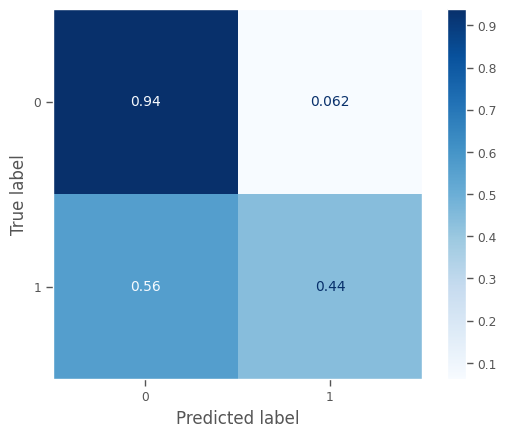

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

metrics_eval_model()


**Interpretation: Classification Report**
----------

Before tuning, the KNN model achieved an accuracy of 83% on the test set, meaning it correctly predicted the income levels for about 83% of the individuals in the test data.

It had a recall of 56% for individuals with income >50K (class 1) and a precision of 67% for class 1 predictions. For individuals with income <=50K (class 0), the model showed a high recall of 91% and a precision of 87%.


> **In summary, the model performed well in identifying individuals with income <=50K but struggled to accurately identify higher-income individuals, resulting in lower recall and precision for class 1 predictions. Further tuning and refinement are needed to improve performance for class 1 predictions.**

---

### **Tuning:**

In [65]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [66]:
param_grid = {'n_neighbors': [3,5,6,7,8,10], 'weights':['distance','uniform'], 'leaf_size': [2,3,4,5,10]}

In [67]:
knn_grid_search = GridSearchCV(knn, param_grid)

In [68]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 3, 4, 5, 10],
                         'n_neighbors': [3, 5, 6, 7, 8, 10],
                         'weights': ['distance', 'uniform']})

In [69]:
knn_grid_search.best_params_

{'leaf_size': 2, 'n_neighbors': 10, 'weights': 'uniform'}

## **Best model evalution:**

In [70]:
best_model_knn = knn_grid_search.best_estimator_

The accuracy of the Tuned KNN Model is 0.8326551904016692
Training set Evals :

accuracy is 0.858.
recall is 0.565.
precision is 0.780.
------------------------------------------------------------
Test set Evals :

accuracy is 0.833.
recall of is 0.506.
precision of is 0.723.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      7254
           1       0.72      0.51      0.60      2331

    accuracy                           0.83      9585
   macro avg       0.79      0.72      0.74      9585
weighted avg       0.82      0.83      0.82      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


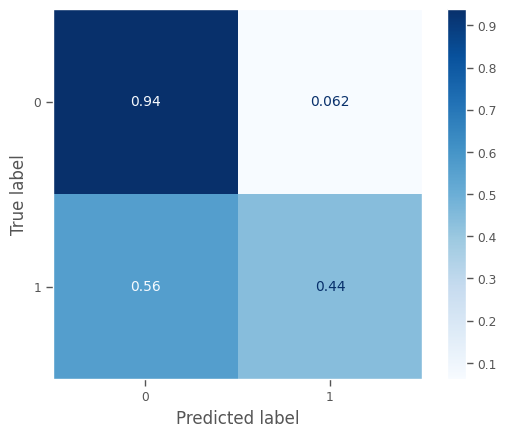

In [71]:
knn_pipe = make_pipeline(best_model_knn)

knn_pipe.fit(X_train,y_train)

train_pred = knn_pipe.predict(X_train)
test_pred = knn_pipe.predict(X_test)

score_knn = knn_pipe.score(X_test,y_test)
print('The accuracy of the Tuned KNN Model is',score_knn)

metrics_eval_model()

**Training metrics and testing metrics are close enough. no undefit or overfit problem.**

**Interpretation: Classification Report**
----------

* After hyperparameter tuning, the Tuned KNN model achieved a modest improvement in accuracy (from 82.64% to 83.27%) on the test set. The model maintained high recall and precision for individuals with income <=50K (class 0), indicating its consistency in identifying lower-income individuals.

* However, the recall for class 1 (income >50K) remained the same at 51%, suggesting that tuning did not significantly impact the model's ability to identify higher-income individuals. The precision for class 1 improved from 67% to 72%, indicating that when the model predicted class 1, it was correct about 72% of the time.

> **Overall, hyperparameter tuning has led to a slight improvement in the KNN model's accuracy and precision for higher-income individuals, making it more balanced in its predictions without compromising its ability to identify lower-income individuals.**

-----
------

## **Random Forest**

The accuracy of the Random Forest Classifier Model is 0.8572769953051643
Training set Evals :

accuracy is 1.000.
recall is 1.000.
precision is 1.000.
------------------------------------------------------------
Test set Evals :

accuracy is 0.857.
recall of is 0.619.
precision of is 0.751.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7254
           1       0.75      0.62      0.68      2331

    accuracy                           0.86      9585
   macro avg       0.82      0.78      0.79      9585
weighted avg       0.85      0.86      0.85      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


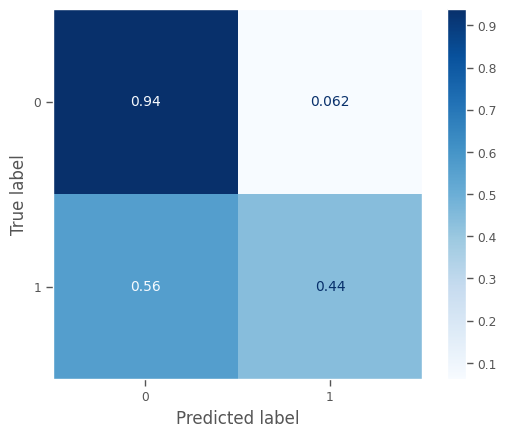

In [72]:
#Random Forest
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

score_rf = rf.score(X_test,y_test)
print('The accuracy of the Random Forest Classifier Model is',score_rf)

metrics_eval_model()

**Interpretation: Classification Report**
----------

* Before tuning, the Random Forest Classifier achieved an accuracy of 86% on the test set. It demonstrated high recall (93%) and precision (88%) for individuals with income <=50K (class 0). For those with income >50K (class 1), it had a recall of 62% and precision of 75%.

* The model excelled in identifying individuals with income <=50K but had room for improvement in identifying higher-income individuals.

> **Overall, the Random Forest model shows promise, and further tuning may help fine-tune its performance, especially for class 1 predictions.**

## **Tuning:**

In [73]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [74]:
# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf, param_grid, n_jobs = -1, verbose = 1)

In [75]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [76]:
rf_grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

## **Best model evalution:**

In [77]:
best_model_rf = rf_grid_search.best_estimator_

The accuracy of the Tuned Random Forest Classifier Model is 0.8688575899843506
Training set Evals :

accuracy is 0.895.
recall is 0.677.
precision is 0.853.
------------------------------------------------------------
Test set Evals :

accuracy is 0.869.
recall of is 0.610.
precision of is 0.803.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7254
           1       0.80      0.61      0.69      2331

    accuracy                           0.87      9585
   macro avg       0.84      0.78      0.81      9585
weighted avg       0.86      0.87      0.86      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


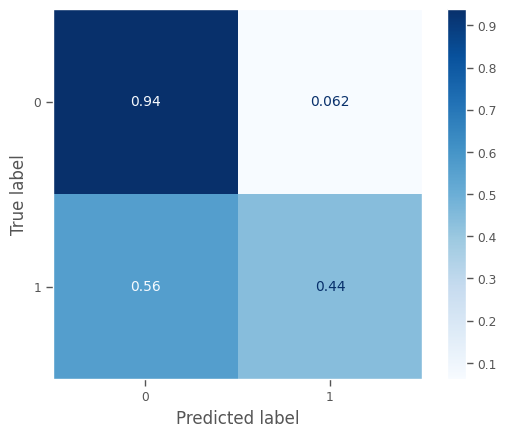

In [78]:
rf_pipe = make_pipeline(best_model_rf)

rf_pipe.fit(X_train,y_train)

train_pred = rf_pipe.predict(X_train)
test_pred = rf_pipe.predict(X_test)

score_rf = rf_pipe.score(X_test,y_test)
print('The accuracy of the Tuned Random Forest Classifier Model is',score_rf)

metrics_eval_model()

**Interpretation: Classification Report**
----------

* After hyperparameter tuning, the Tuned Random Forest Classifier model achieved a slight improvement in accuracy (from 85.73% to 86.89%) on the test set. The model maintained high recall and precision for individuals with income <=50K (class 0), indicating its consistency in identifying lower-income individuals.

* The significant enhancement is observed in the model's ability to identify higher-income individuals (class 1), where the recall improved from 51% to 61%. This suggests that the tuned model is more effective in identifying higher-income individuals while maintaining precision at 75%.

> **Overall, hyperparameter tuning has led to a more balanced Random Forest Classifier model, improving its sensitivity to higher-income individuals without compromising precision.**

------
------

## **Best Tuned Model**
----

**Based on the evaluation metrics of the tuned models, it appears that the `Random Forest Classifier outperforms both the Logistic Regression and K-Nearest Neighbors (KNN) models`. The Tuned Random Forest Classifier achieved the `highest accuracy of approximately 87%`, coupled with a balanced recall and precision, making it a strong choice for this classification task. It exhibits an impressive ability to correctly predict both income groups (<=50K and >50K) while maintaining good overall precision and recall scores.**

* **While all models exhibit room for improvement, the Random Forest Classifier demonstrates the most promising results among the three, offering a robust foundation for further refinement and optimization in subsequent analyses and applications.**

-------
------

## **Feature Engineering and PCA Analysis**

**In preparation for modeling, I have already performed some initial feature engineering on the dataset. This includes:**

1. **Income Encoding:** I encoded the 'income' feature as binary, mapping '<=50K' and '<=50K.' to 0, and '>50K' and '>50K.' to 1.

2. **Education Level Categorization:** I grouped and recategorized 'education' levels to simplify and enhance their representation.

3. **Marital Status Simplification:** 'Marital-status' was grouped into broader categories to simplify the feature.

> Now, to further improve the dataset and understand the impact on modeling, I will apply additional feature engineering techniques. Additionally, I will explore the application of Principal Component Analysis (PCA) to capture underlying patterns and reduce dimensionality. The objective is to observe how these changes influence the modeling results.

Let's proceed with these enhancements and analyze the outcomes.

In [79]:
df_copy.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,dropout,not married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,0
1,38,Private,89814,HighGrad,married,Farming-fishing,Husband,Male,0,0,50,United-States,0
2,28,Local-gov,336951,CommunityCollege,married,Protective-serv,Husband,Male,0,0,40,United-States,1
3,44,Private,160323,CommunityCollege,married,Machine-op-inspct,Husband,Male,7688,0,40,United-States,1
4,18,Private,103497,CommunityCollege,not married,Prof-specialty,Own-child,Female,0,0,30,United-States,0


In [80]:
# more Feature Engineering
# Create interaction feature 'age-hours'
df_copy['hours-per-month'] = df_copy['hours-per-week'] * 4
df_copy['age-hours-per-week'] = df_copy['age'] * df_copy['hours-per-week']
df_copy['age-hours-per-month'] = df_copy['age'] * df_copy['hours-per-week'] * 4

In [81]:
df_copy.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hours-per-month,age-hours-per-week,age-hours-per-month
0,25,Private,226802,dropout,not married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,0,160,1000,4000
1,38,Private,89814,HighGrad,married,Farming-fishing,Husband,Male,0,0,50,United-States,0,200,1900,7600
2,28,Local-gov,336951,CommunityCollege,married,Protective-serv,Husband,Male,0,0,40,United-States,1,160,1120,4480
3,44,Private,160323,CommunityCollege,married,Machine-op-inspct,Husband,Male,7688,0,40,United-States,1,160,1760,7040
4,18,Private,103497,CommunityCollege,not married,Prof-specialty,Own-child,Female,0,0,30,United-States,0,120,540,2160


In [82]:
df_copy.dtypes

age                     int64
workclass              object
fnlwgt                  int64
education              object
marital-status         object
occupation             object
relationship           object
gender                 object
capital-gain            int64
capital-loss            int64
hours-per-week          int64
native-country         object
income                  int64
hours-per-month         int64
age-hours-per-week      int64
age-hours-per-month     int64
dtype: object

In [83]:
#creating a list of object columns
categorical_columns = list(df_copy.select_dtypes(include='object'))

#Encoding categorical variables (using label encoding)
encoder = LabelEncoder()
for col in categorical_columns:
    df_copy[col] = encoder.fit_transform(df_copy[col])

# Splitting the dataset into features (X) and target (y)
X1 = df_copy.drop(columns=['income'])
y1 = df_copy['income']

# Feature scaling
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X1)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_Scaled)


In [84]:
X_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-1.41,0.30,-0.68,1.08,0.22,0.14,-0.27,-0.71,-0.52,1.49,-0.40
1,1.65,-0.57,-0.47,-0.29,0.06,-0.56,-0.55,-0.96,0.42,0.53,0.42
2,-0.30,-1.27,-1.70,0.09,-0.74,-0.28,2.24,-0.20,-0.33,-0.42,0.59
3,1.03,-1.18,-0.12,-0.77,0.60,-0.51,0.49,0.33,0.41,-0.25,0.18
4,-3.14,0.90,-0.41,-0.97,0.38,0.72,0.12,-0.31,0.50,-0.33,0.35


In [85]:
# Now, we can use X_pca for modeling or X for feature-engineered data.
# We will Train and evaluate the best Tuned model on the X_pca data to observe the impacts on results.

# Splitting the data into training and testing sets (adjust test_size as needed)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y1, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data, while X_test and y_test contain the testing data.

-----
------

## **Random Forest**

The accuracy of the Random Forest Classifier Model is 0.8320292123109024
Training set Evals :

accuracy is 1.000.
recall is 0.999.
precision is 1.000.
------------------------------------------------------------
Test set Evals :

accuracy is 0.832.
recall of is 0.535.
precision of is 0.704.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7254
           1       0.70      0.53      0.61      2331

    accuracy                           0.83      9585
   macro avg       0.78      0.73      0.75      9585
weighted avg       0.82      0.83      0.82      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


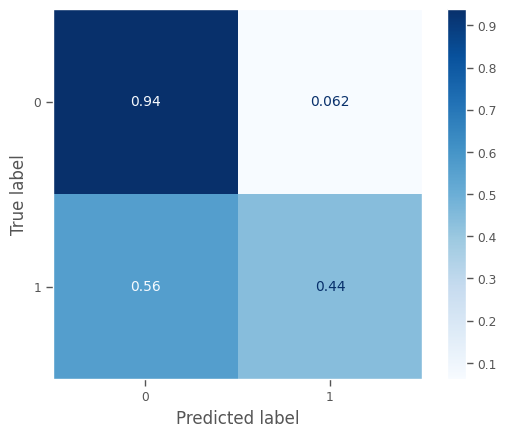

In [86]:
#Random Forest
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_pca,y_train_pca)

train_pred = rf.predict(X_train_pca)
test_pred = rf.predict(X_test_pca)

score_rf = rf.score(X_test_pca,y_test_pca)
print('The accuracy of the Random Forest Classifier Model is',score_rf)

metrics_eval_model()

**Tuning**
----
* Using the best tuned model (Random Forest Classifier)
---


In [87]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [100,150, 200, 250,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf, param_grid, n_jobs = -1, verbose = 1)


In [89]:
rf_grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [90]:
rf_grid_search.best_params_

{'max_depth': 20, 'n_estimators': 300}

In [91]:
best_model_rf = rf_grid_search.best_estimator_

The accuracy of the Tuned Random Forest Classifier Model is 0.8376630151278038
Training set Evals :

accuracy is 0.989.
recall is 0.959.
precision is 0.993.
------------------------------------------------------------
Test set Evals :

accuracy is 0.838.
recall of is 0.548.
precision of is 0.718.
------------------------------------------------------------
Classification Report of the Test set :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7254
           1       0.72      0.55      0.62      2331

    accuracy                           0.84      9585
   macro avg       0.79      0.74      0.76      9585
weighted avg       0.83      0.84      0.83      9585

------------------------------------------------------------
Normalized Confusion Matrix for the test set:
------------------------------------------------------------


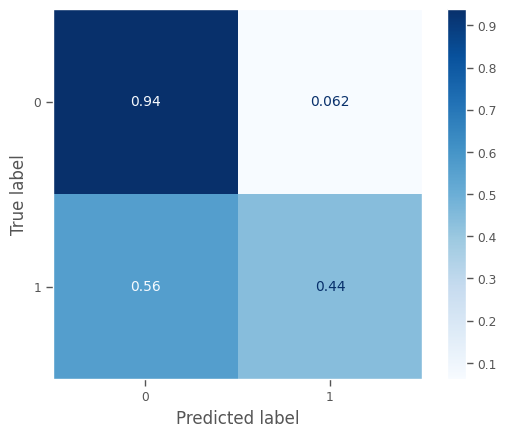

In [92]:
rf_pipe = make_pipeline(best_model_rf)

rf_pipe.fit(X_train_pca,y_train_pca)

train_pred = rf_pipe.predict(X_train_pca)
test_pred = rf_pipe.predict(X_test_pca)

score_rf = rf_pipe.score(X_test_pca,y_test_pca)
print('The accuracy of the Tuned Random Forest Classifier Model is',score_rf)

metrics_eval_model()

----
----

**The best "production" model for the given business problem is the Tuned Random Forest Classifier on the original dataset before applying PCA and feature engineering techniques. Here's the justification for this decision based on the most important metrics for the business problem:**

**Tuned Random Forest Classifier on the Original Dataset (before PCA and feature engineering):**

* Accuracy: 0.869
* Recall for class 1: 0.610
*Precision for class 1: 0.803

**Interpretation and Justification:**

1. **High Accuracy:** The accuracy of this model is 0.869, which is quite high and indicates that it correctly classifies individuals into their respective income groups (<=50K and >50K).

2. **Reasonable Recall:** The recall for class 1 (income >50K) is 0.610. This means the model is effective at identifying individuals with high incomes. In business scenarios like marketing or financial services, it's crucial to identify potential high-income customers, and this model does a reasonably good job.

3. **Precision:** The precision for class 1 is 0.803, which means that when the model predicts someone as having an income greater than 50K, it is correct approximately 80% of the time. This indicates a low rate of false positives, which is important for avoiding wasted resources in marketing campaigns or loan approvals.


4. **Comparison with PCA and Feature Engineering:** Although the model on the PCA and feature-engineered dataset achieved a high accuracy, its recall for class 1 is lower (0.548), indicating that it may miss some high-income individuals. While precision remains reasonable, it's essential to prioritize recall for this business problem.
in this case the pca and feauture engineering like adding new columns to the dataset still achived a good overall accuracy but the Tuned Random Forest Classifier before appying PCA did better.

> **In summary, the Tuned Random Forest Classifier on the original dataset without PCA and feature engineering is chosen as the best "production" model because it effectively identifies potential high-income individuals while maintaining a reasonable level of precision. This model is well-aligned with the business goal of maximizing revenue opportunities and avoiding unnecessary resource allocation.**


------
--------



## **Business Problem Interpretation :**

The business problem, centered around predicting annual income from demographic and socioeconomic features , has critical implications for various stakeholders and for targeted marketing or financial services.Missing high-income customers can result in missed revenue opportunities, but precision is also crucial to avoid wasting resources on false positives. This model strikes a balance between these objectives.
 * In the context of the provided dataset, which focuses on the annual income of adults, the objectives are refined as follows:

**`Objective:`** To accurately predict an individual's annual income based on their demographic and socioeconomic attributes.

**Significance:**
---

**`HR and Recruitment:`** Organizations can leverage accurate income predictions for optimizing recruitment processes and offering competitive compensation packages to attract and retain skilled employees.

**`Economic Policy:`** Government agencies and policymakers can utilize predictive models to assess income disparities, design targeted economic policies, and plan social programs that promote income equity and welfare.

**`Financial Services:`** Financial institutions can make informed lending decisions and assess creditworthiness more accurately, ensuring responsible lending practices.

**`Marketing and Sales:`** Businesses can segment customers effectively based on income levels, tailoring marketing strategies and product offerings for improved customer engagement and revenue generation.

**`Socioeconomic Research:`** Researchers can analyze trends in income distribution and investigate factors contributing to income disparities, aiding in a better understanding of societal dynamics.

**Key Metrics for Success:**
---

**`Accuracy:`** The accuracy of the model is crucial to ensure that predictions align closely with actual income levels, enabling informed decision-making.

**`Precision and Recall:`** Balancing precision and recall is essential. High precision minimizes false positives, while high recall ensures that a substantial portion of high-income individuals is correctly identified.

**`F1-Score:`** The F1-score, considering both precision and recall, provides a holistic measure of model performance.

**`Interpretability:`** Models like Random Forest, which offer interpretability, are preferred in contexts where stakeholders need to understand the reasons behind predictions.

> **In summary, the revised interpretation underscores the importance of accurately predicting annual income for various stakeholders, including organizations, policymakers, financial institutions, businesses, and researchers. The chosen "production" model, the Tuned Random Forest Classifier, demonstrates strong performance in achieving these objectives while maintaining interpretability and consistency between training and test sets.**

----
----